In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

from utils import summarize_df, plot_signals_p_value, plot_signals_auc, plot_signals_gini, plot_conf_int, plot_correction
from utils import plot_AUC,plot_signals_youden, plot_signals_roc01, summarize_thresholds, summarize_thresholds2, summarize_sen_spe
from statsmodels.stats.multitest import multipletests

In [2]:
infections = pd.read_csv('epi_data_age_gender.csv')
healthy_idxs = list(infections[infections.Group == 'HC'].ID)
uninf_idxs = list(infections[(infections.Group != 'HC') & (infections.Infection != 'Yes')].ID)
data = pd.read_excel('S1File.xlsx', sheet_name = 'CFS_JPT_Seroarray')
data = data.iloc[1254:1270]
data = data[list(data.columns[:8])+healthy_idxs+uninf_idxs]

# Signals

In [3]:
smr, all_lower_bounds, all_p_values, auc, gini, x_plot, y_plot, youden, roc01 = summarize_df(data, 8, 58)

**Chi-squared**

In [4]:
smr_p_value = smr[['name', 'min_p_value', 'test_lower_bound', 'test_upper_bound']]
smr_p_value.columns = ['ID', 'minimum p-value', 'lower bound', 'upper bound']
smr_p_value.iloc[:, 2:] = np.round(smr_p_value.iloc[:, 2:], 3)
smr_p_value

ID  minimum p-value  lower bound  upper bound
0               EBNA1_0415 (AG876)         0.001507      987.000      997.667
1               EBNA1_0415 (B95-8)         0.034439      939.000      963.333
2               EBNA1_0419 (AG876)         0.178873      844.000      845.667
3          EBNA1_0419 (B95-8, GD1)         0.020677     1033.333     1034.000
4               EBNA1_0423 (AG876)         0.026980      866.667      871.500
5          EBNA1_0423 (B95-8, GD1)         0.040382     1195.667     1197.333
6                 EBNA1_0427 (GD1)         0.134204      928.667      949.333
7        EBNA1_0430 (AG876, B95-8)         0.044809      873.667      889.333
8                 EBNA1_0431 (GD1)         0.011503      933.000      933.667
9        EBNA1_0434 (AG876, B95-8)         0.018761      923.333      929.333
10                EBNA1_0435 (GD1)         0.022629      863.333      869.667
11  EBNA1_0440 (AG876, B95-8, GD1)         0.056000      899.000      924.333
12  EBNA1_0444 (AG876, B95-8, GD1)         0.052663      912.667      927.667
13  EBNA1_0448 (AG876, B95-8, GD1)         0.012954      841.667      848.333
14              EBNA1_0452 (AG876)         0.143413      964.000      969.667
15         EBNA1_0452 (B95-8, GD1)         0.193461     1227.667     1228.667

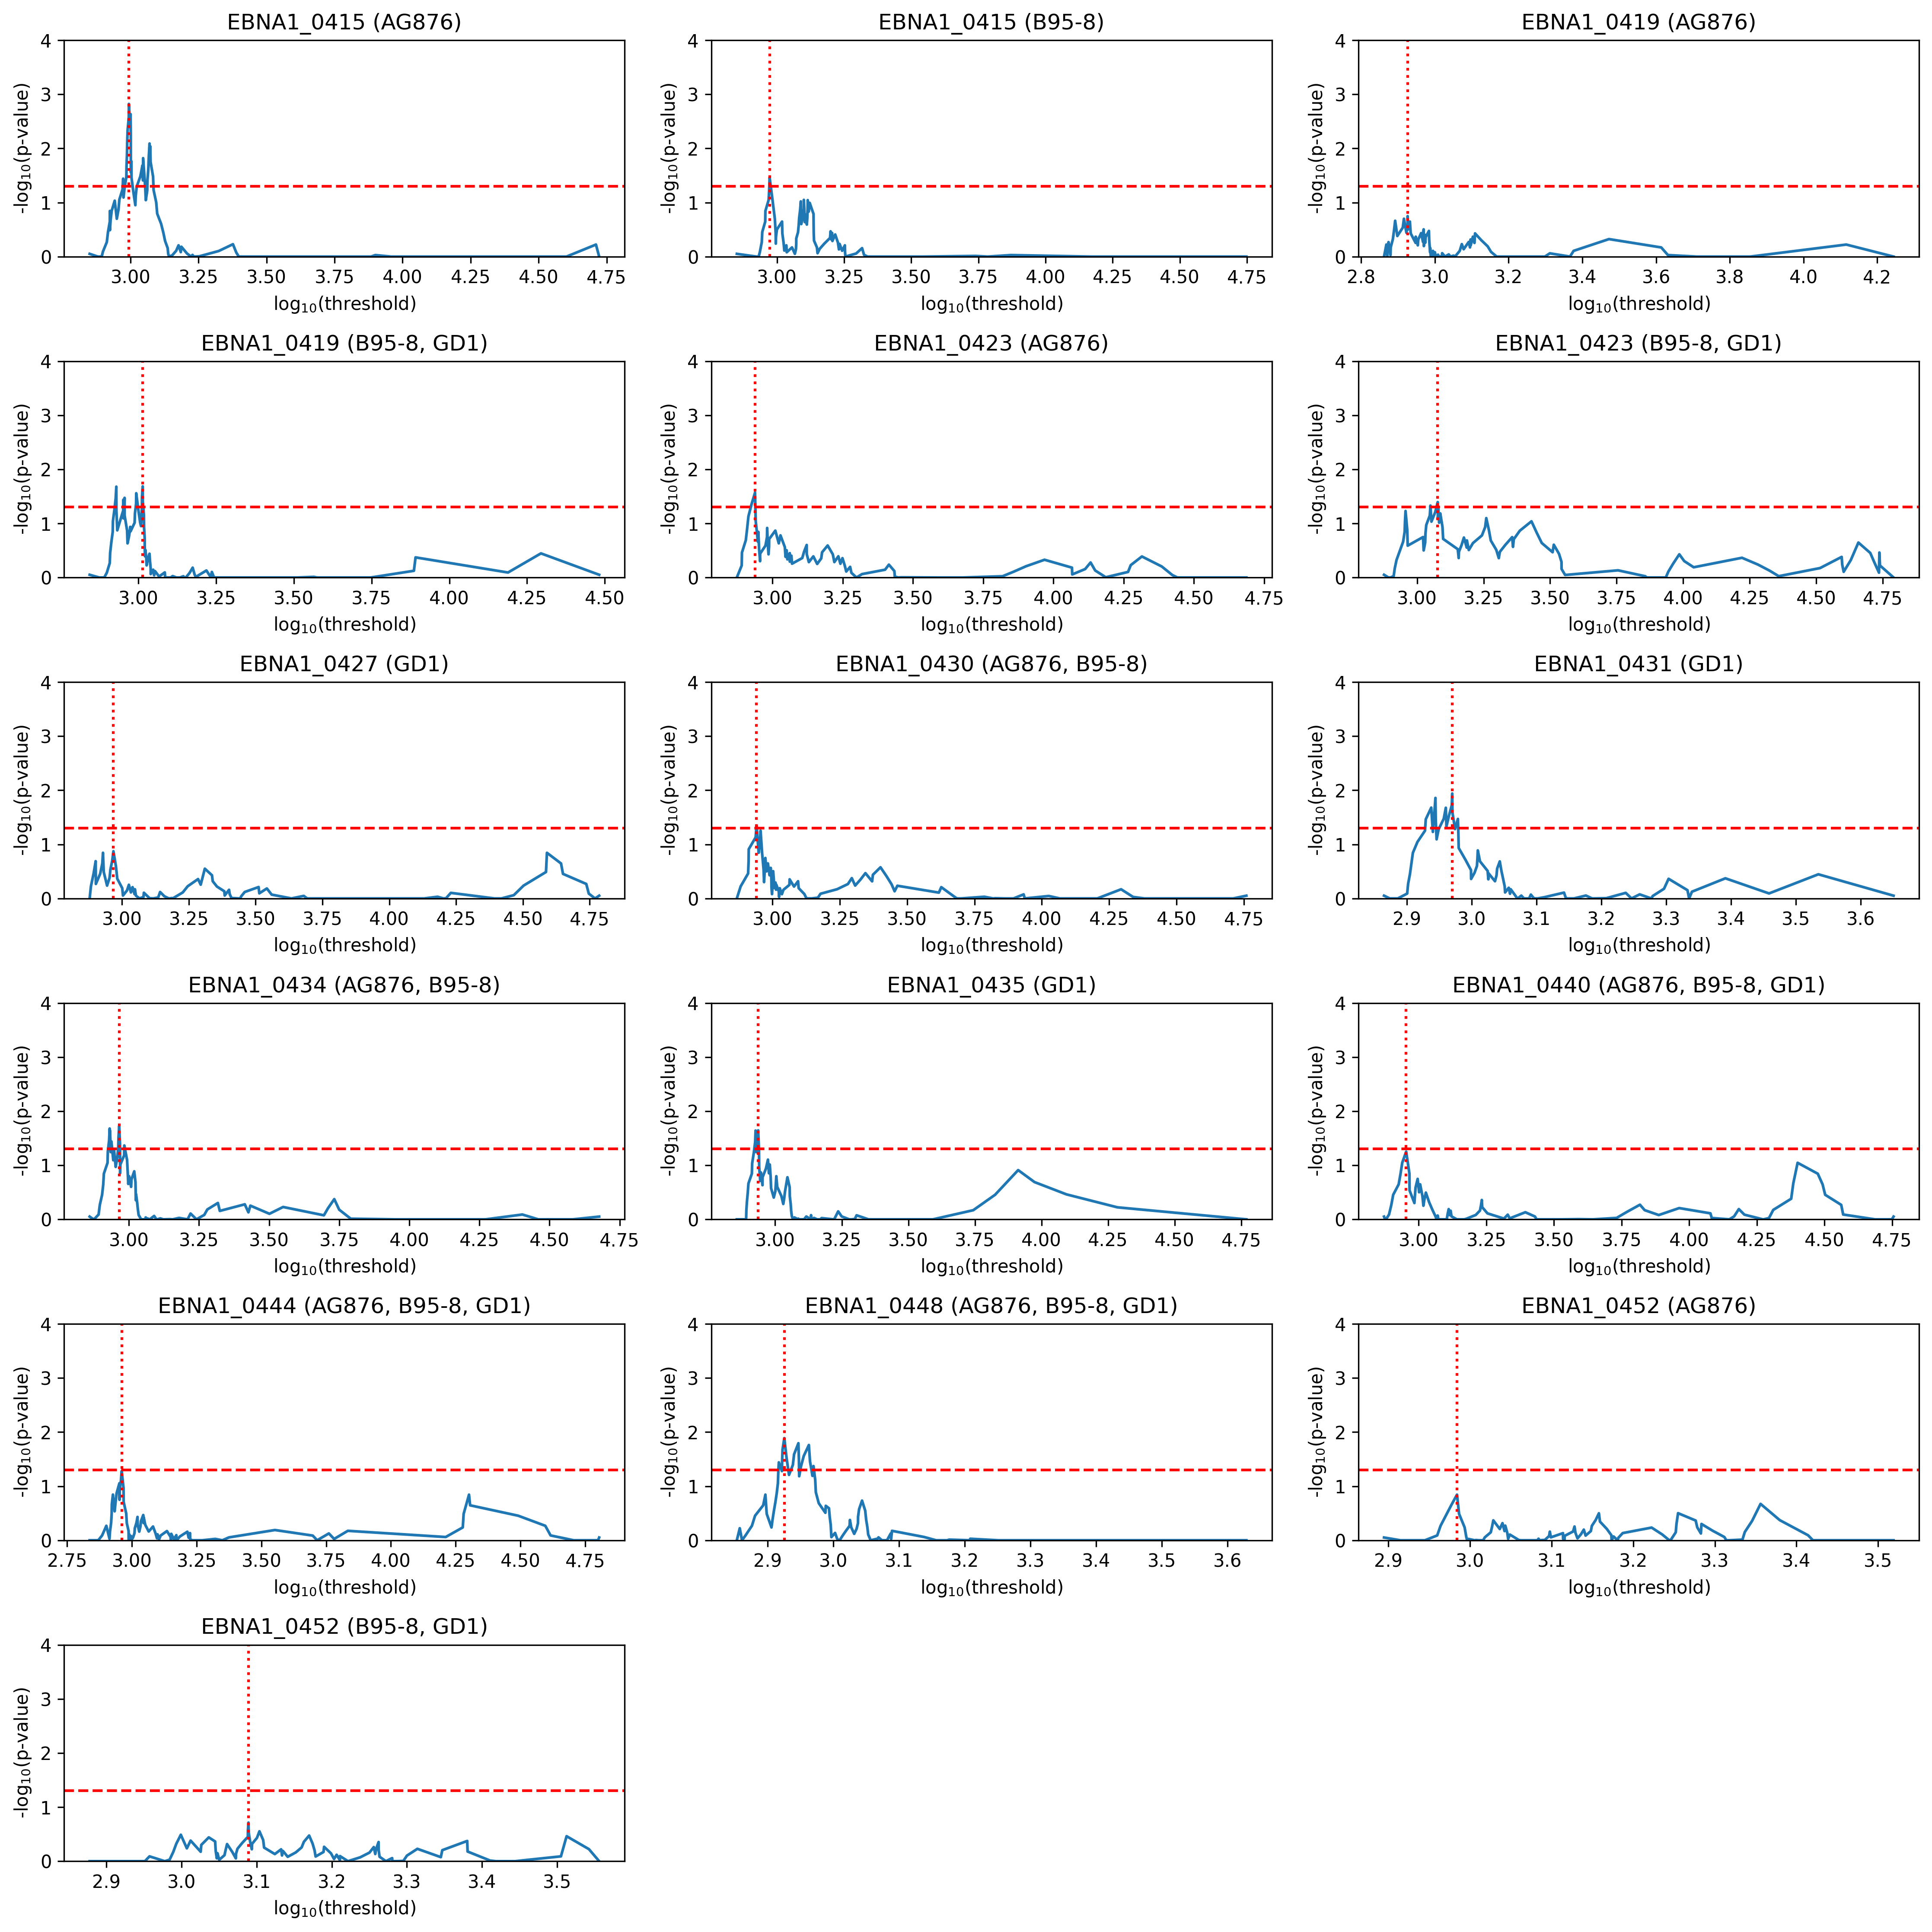

In [5]:
plot_signals_p_value(smr, all_lower_bounds, all_p_values)

**ROC with AUC**

In [6]:
smr_roc = smr[['name', 'AUC_total', 'min_roc01', 'max_youden', 'min_dist']]
smr_roc.columns = ['ID', 'AUC', 'ROC01', "Youden's J-statistic", '|Sen-Spe|']
smr_roc.iloc[:, 1:] = np.round(smr_roc.iloc[:, 1:], 3)
smr_roc

ID    AUC  ROC01  Youden's J-statistic  \
0               EBNA1_0415 (AG876)  0.643  0.496                 0.335   
1               EBNA1_0415 (B95-8)  0.584  0.562                 0.205   
2               EBNA1_0419 (AG876)  0.526  0.643                 0.135   
3          EBNA1_0419 (B95-8, GD1)  0.601  0.527                 0.271   
4               EBNA1_0423 (AG876)  0.575  0.606                 0.162   
5          EBNA1_0423 (B95-8, GD1)  0.580  0.559                 0.222   
6                 EBNA1_0427 (GD1)  0.508  0.685                 0.141   
7        EBNA1_0430 (AG876, B95-8)  0.562  0.637                 0.154   
8                 EBNA1_0431 (GD1)  0.593  0.591                 0.268   
9        EBNA1_0434 (AG876, B95-8)  0.586  0.591                 0.248   
10                EBNA1_0435 (GD1)  0.559  0.589                 0.221   
11  EBNA1_0440 (AG876, B95-8, GD1)  0.516  0.633                 0.154   
12  EBNA1_0444 (AG876, B95-8, GD1)  0.543  0.621                 0.195   
13  EBNA1_0448 (AG876, B95-8, GD1)  0.595  0.561                 0.269   
14              EBNA1_0452 (AG876)  0.531  0.639                 0.127   
15         EBNA1_0452 (B95-8, GD1)  0.557  0.620                 0.157   

    |Sen-Spe|  
0       0.335  
1       0.205  
2       0.135  
3       0.271  
4       0.162  
5       0.222  
6       0.141  
7       0.154  
8       0.268  
9       0.248  
10      0.221  
11      0.154  
12      0.195  
13      0.269  
14      0.127  
15      0.157

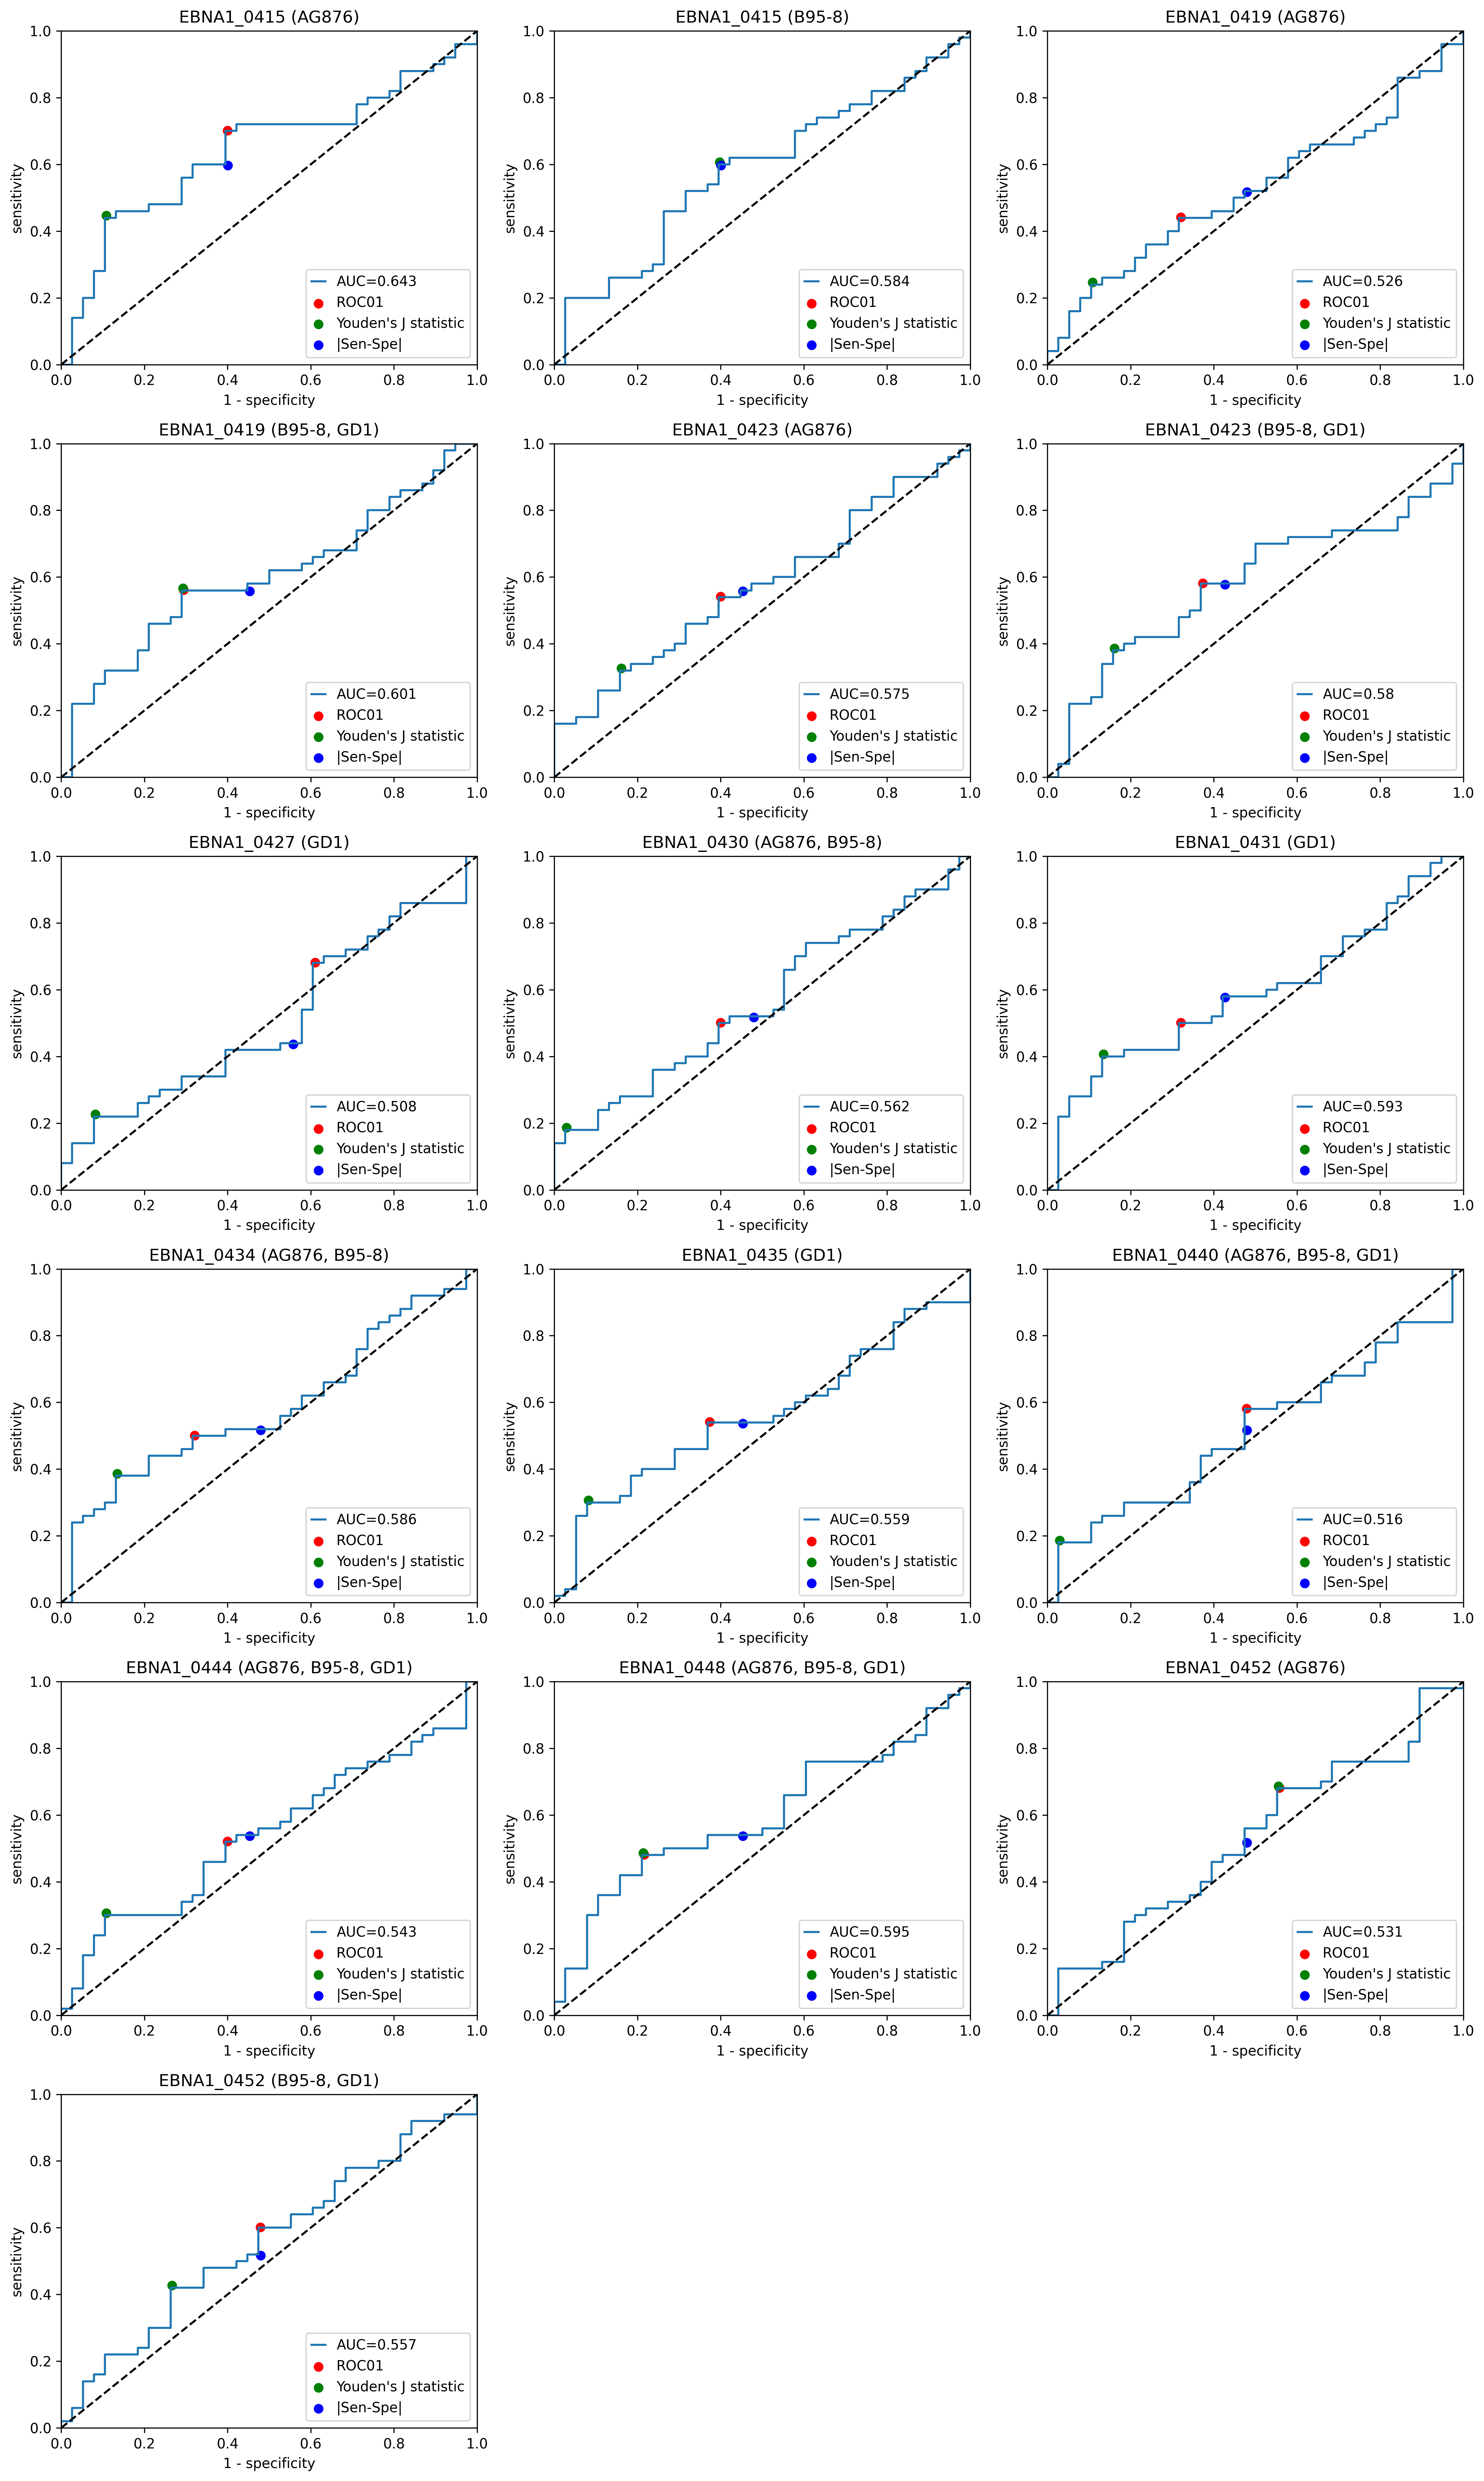

In [7]:
plot_AUC(smr, x_plot, y_plot)

**Youden**

In [8]:
smr_youden = smr[['name', 'max_youden', 'youden_lower_bound', 'youden_upper_bound']]
smr_youden.columns = ['ID', "Youden's J statistic", 'lower bound', 'upper bound']
smr_youden.iloc[:, 1:] = np.round(smr_youden.iloc[:, 1:], 3)
smr_youden

ID  Youden's J statistic  lower bound  \
0               EBNA1_0415 (AG876)                 0.335      987.000   
1               EBNA1_0415 (B95-8)                 0.205     1302.000   
2               EBNA1_0419 (AG876)                 0.135      844.000   
3          EBNA1_0419 (B95-8, GD1)                 0.271     1033.333   
4               EBNA1_0423 (AG876)                 0.162     1023.500   
5          EBNA1_0423 (B95-8, GD1)                 0.222     1195.667   
6                 EBNA1_0427 (GD1)                 0.141      928.667   
7        EBNA1_0430 (AG876, B95-8)                 0.154      904.000   
8                 EBNA1_0431 (GD1)                 0.268      933.000   
9        EBNA1_0434 (AG876, B95-8)                 0.248      923.333   
10                EBNA1_0435 (GD1)                 0.221      863.333   
11  EBNA1_0440 (AG876, B95-8, GD1)                 0.154      899.000   
12  EBNA1_0444 (AG876, B95-8, GD1)                 0.195      912.667   
13  EBNA1_0448 (AG876, B95-8, GD1)                 0.269      917.333   
14              EBNA1_0452 (AG876)                 0.127     1438.667   
15         EBNA1_0452 (B95-8, GD1)                 0.157     1227.667   

    upper bound  
0       997.667  
1      1313.000  
2       845.667  
3      1034.000  
4      1053.000  
5      1197.333  
6       949.333  
7       915.667  
8       933.667  
9       929.333  
10      869.667  
11      924.333  
12      927.667  
13      921.000  
14     1443.000  
15     1228.667

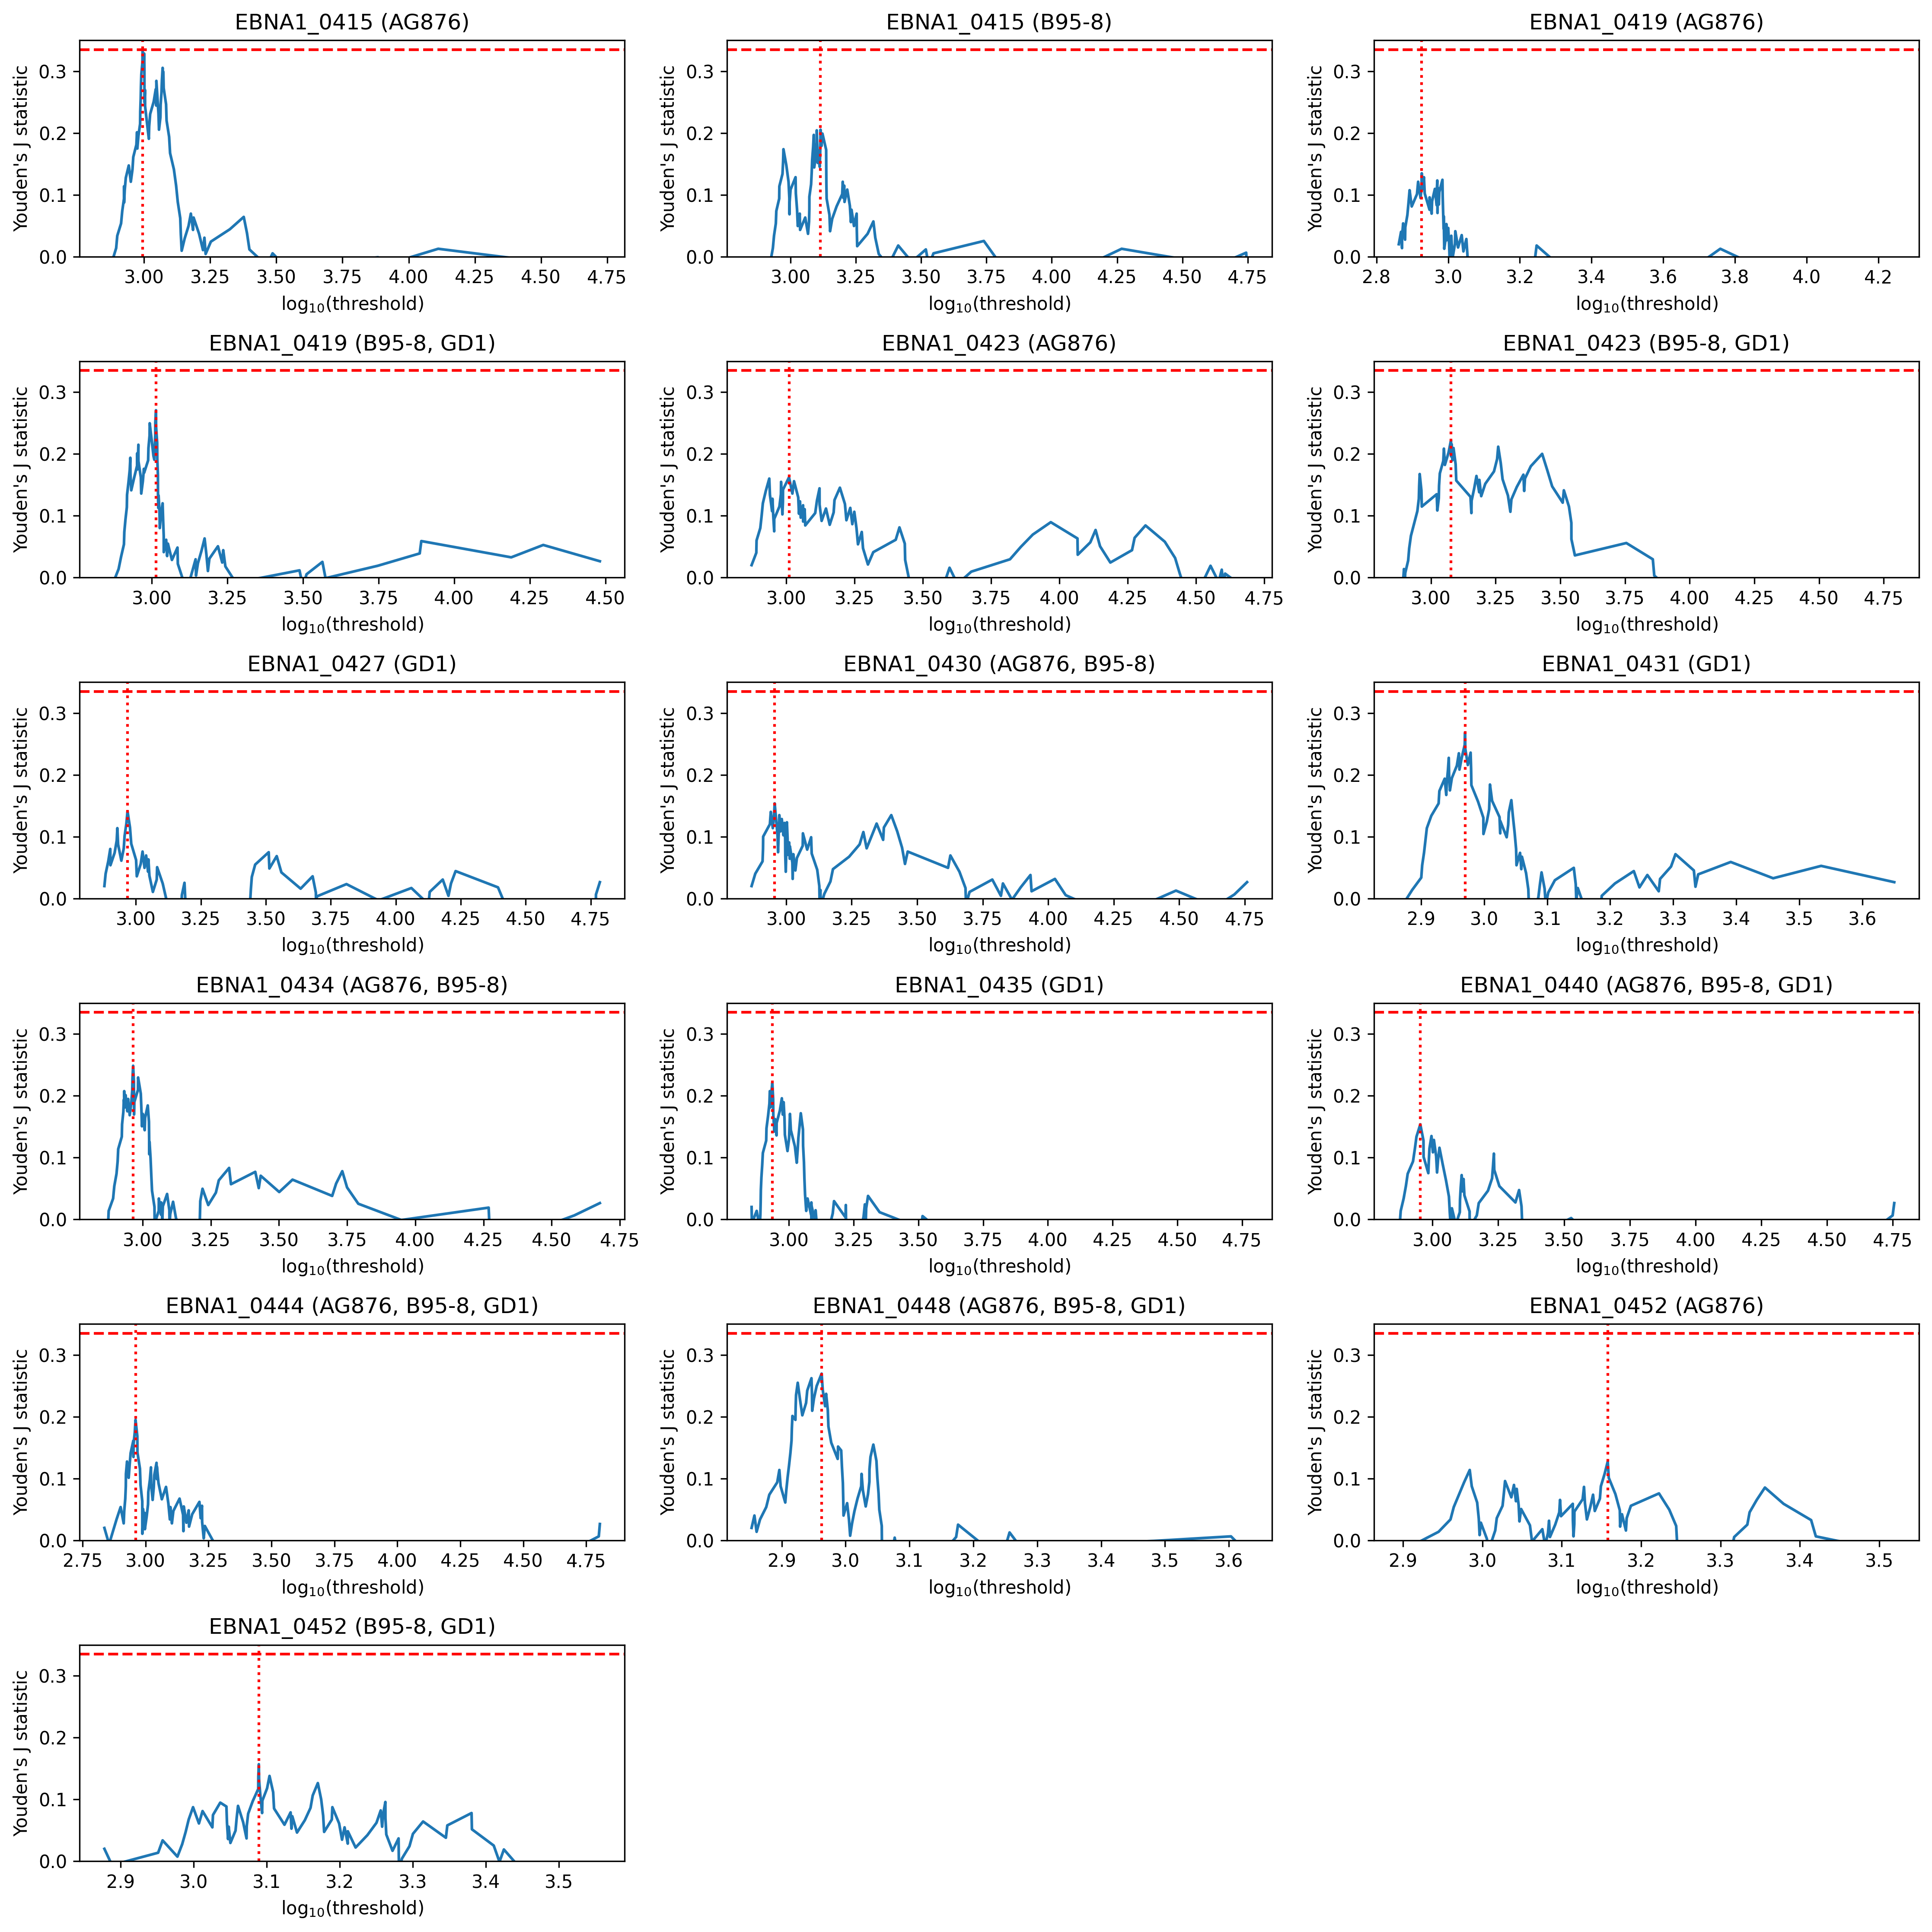

In [9]:
plot_signals_youden(smr, all_lower_bounds, youden)

**ROC01**

In [10]:
smr_roc01 = smr[['name', 'min_roc01', 'roc01_lower_bound', 'roc01_upper_bound']]
smr_roc01.columns = ['ID', "ROC01", 'lower bound', 'upper bound']
smr_roc01.iloc[:, 1:] = np.round(smr_roc01.iloc[:, 1:], 3)
smr_roc01

ID  ROC01  lower bound  upper bound
0               EBNA1_0415 (AG876)  0.496     1175.333     1178.667
1               EBNA1_0415 (B95-8)  0.562     1302.000     1313.000
2               EBNA1_0419 (AG876)  0.643      964.000      965.500
3          EBNA1_0419 (B95-8, GD1)  0.527     1033.333     1034.000
4               EBNA1_0423 (AG876)  0.606     1571.667     1639.667
5          EBNA1_0423 (B95-8, GD1)  0.559     1820.000     1861.333
6                 EBNA1_0427 (GD1)  0.685     3244.500     3263.667
7        EBNA1_0430 (AG876, B95-8)  0.637     1158.667     1203.000
8                 EBNA1_0431 (GD1)  0.591     1021.667     1029.667
9        EBNA1_0434 (AG876, B95-8)  0.591     1044.667     1055.333
10                EBNA1_0435 (GD1)  0.589     1112.000     1112.000
11  EBNA1_0440 (AG876, B95-8, GD1)  0.633     1711.667     1717.333
12  EBNA1_0444 (AG876, B95-8, GD1)  0.621     1105.667     1109.000
13  EBNA1_0448 (AG876, B95-8, GD1)  0.561      917.333      921.000
14              EBNA1_0452 (AG876)  0.639     1438.667     1443.000
15         EBNA1_0452 (B95-8, GD1)  0.620     1478.667     1494.333

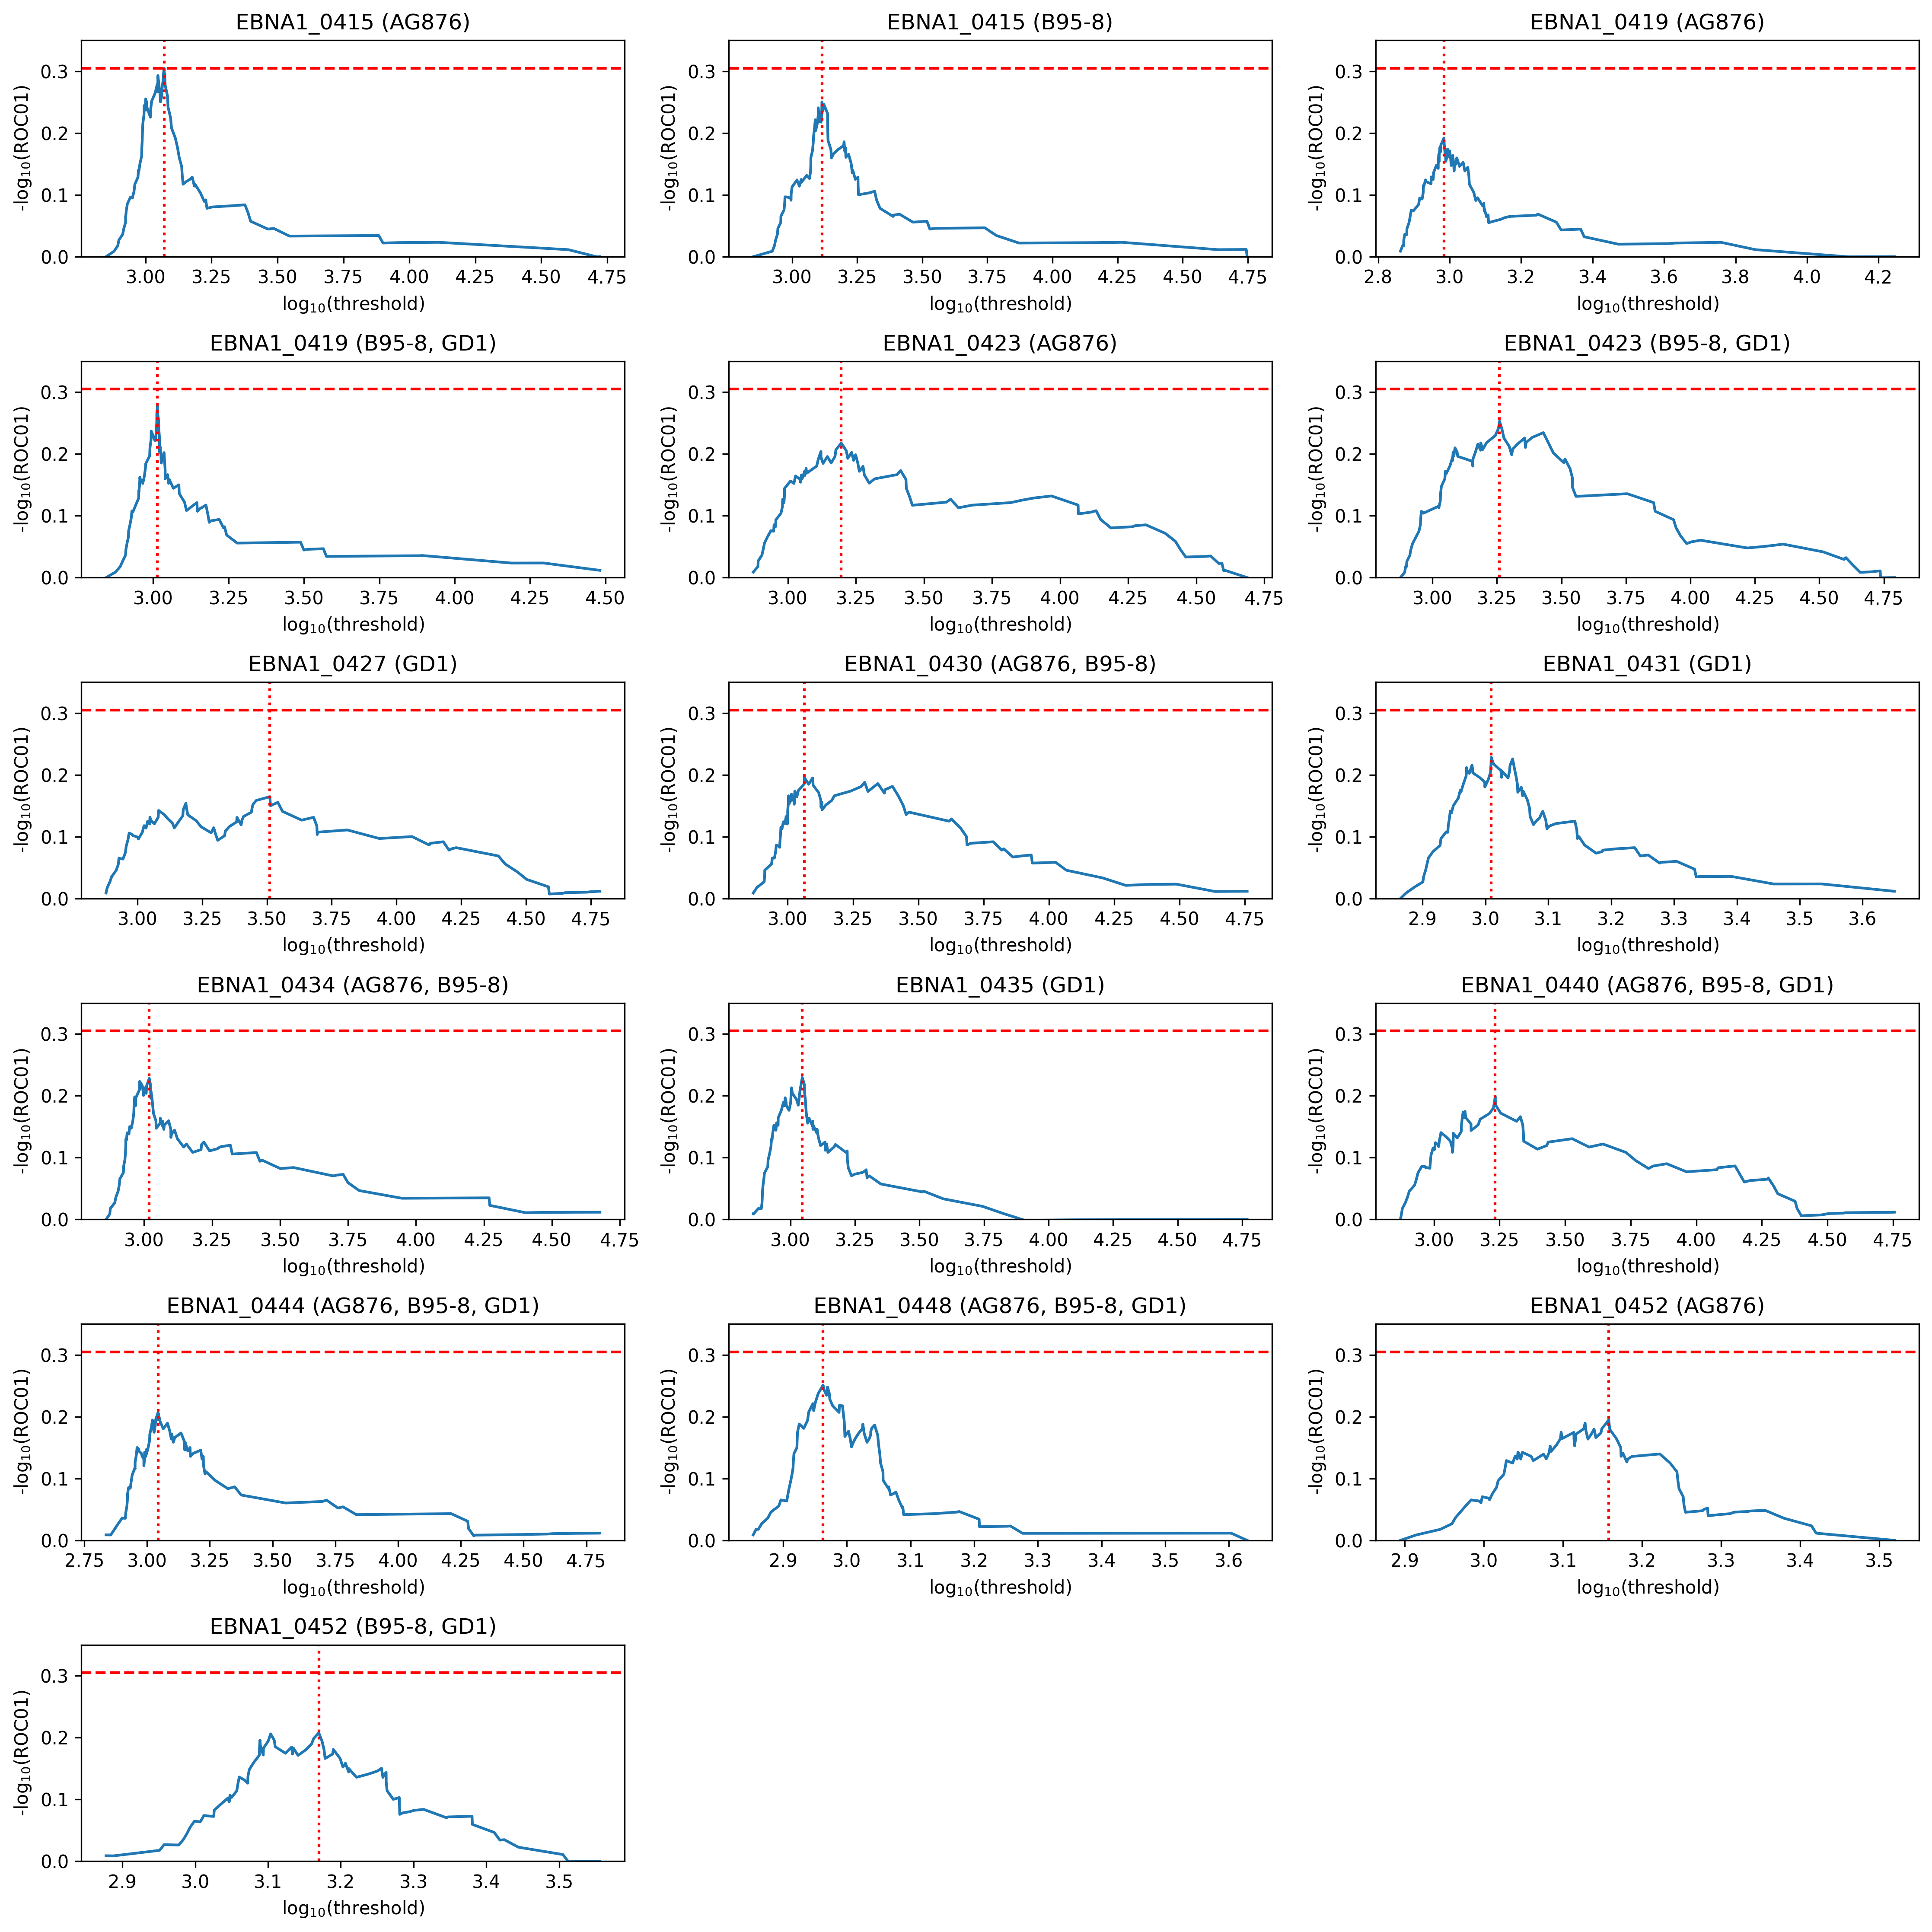

In [11]:
plot_signals_roc01(smr, all_lower_bounds, roc01)

**AUC (single threshold)**

In [12]:
smr_auc = smr[['name', 'max_auc', 'auc_lower_bound', 'auc_upper_bound']]
smr_auc.columns = ['ID', 'maximum AUC', 'lower bound', 'upper bound']
smr_auc.iloc[:, 2:] = np.round(smr_auc.iloc[:, 2:], 3)
smr_auc

ID  maximum AUC  lower bound  upper bound
0               EBNA1_0415 (AG876)     0.667368      987.000      997.667
1               EBNA1_0415 (B95-8)     0.602632     1302.000     1313.000
2               EBNA1_0419 (AG876)     0.567368      844.000      845.667
3          EBNA1_0419 (B95-8, GD1)     0.635263     1033.333     1034.000
4               EBNA1_0423 (AG876)     0.581053     1023.500     1053.000
5          EBNA1_0423 (B95-8, GD1)     0.611053     1195.667     1197.333
6                 EBNA1_0427 (GD1)     0.570526      928.667      949.333
7        EBNA1_0430 (AG876, B95-8)     0.576842      904.000      915.667
8                 EBNA1_0431 (GD1)     0.634211      933.000      933.667
9        EBNA1_0434 (AG876, B95-8)     0.624211      923.333      929.333
10                EBNA1_0435 (GD1)     0.610526      863.333      869.667
11  EBNA1_0440 (AG876, B95-8, GD1)     0.576842      899.000      924.333
12  EBNA1_0444 (AG876, B95-8, GD1)     0.597368      912.667      927.667
13  EBNA1_0448 (AG876, B95-8, GD1)     0.634737      917.333      921.000
14              EBNA1_0452 (AG876)     0.563684     1438.667     1443.000
15         EBNA1_0452 (B95-8, GD1)     0.578421     1227.667     1228.667

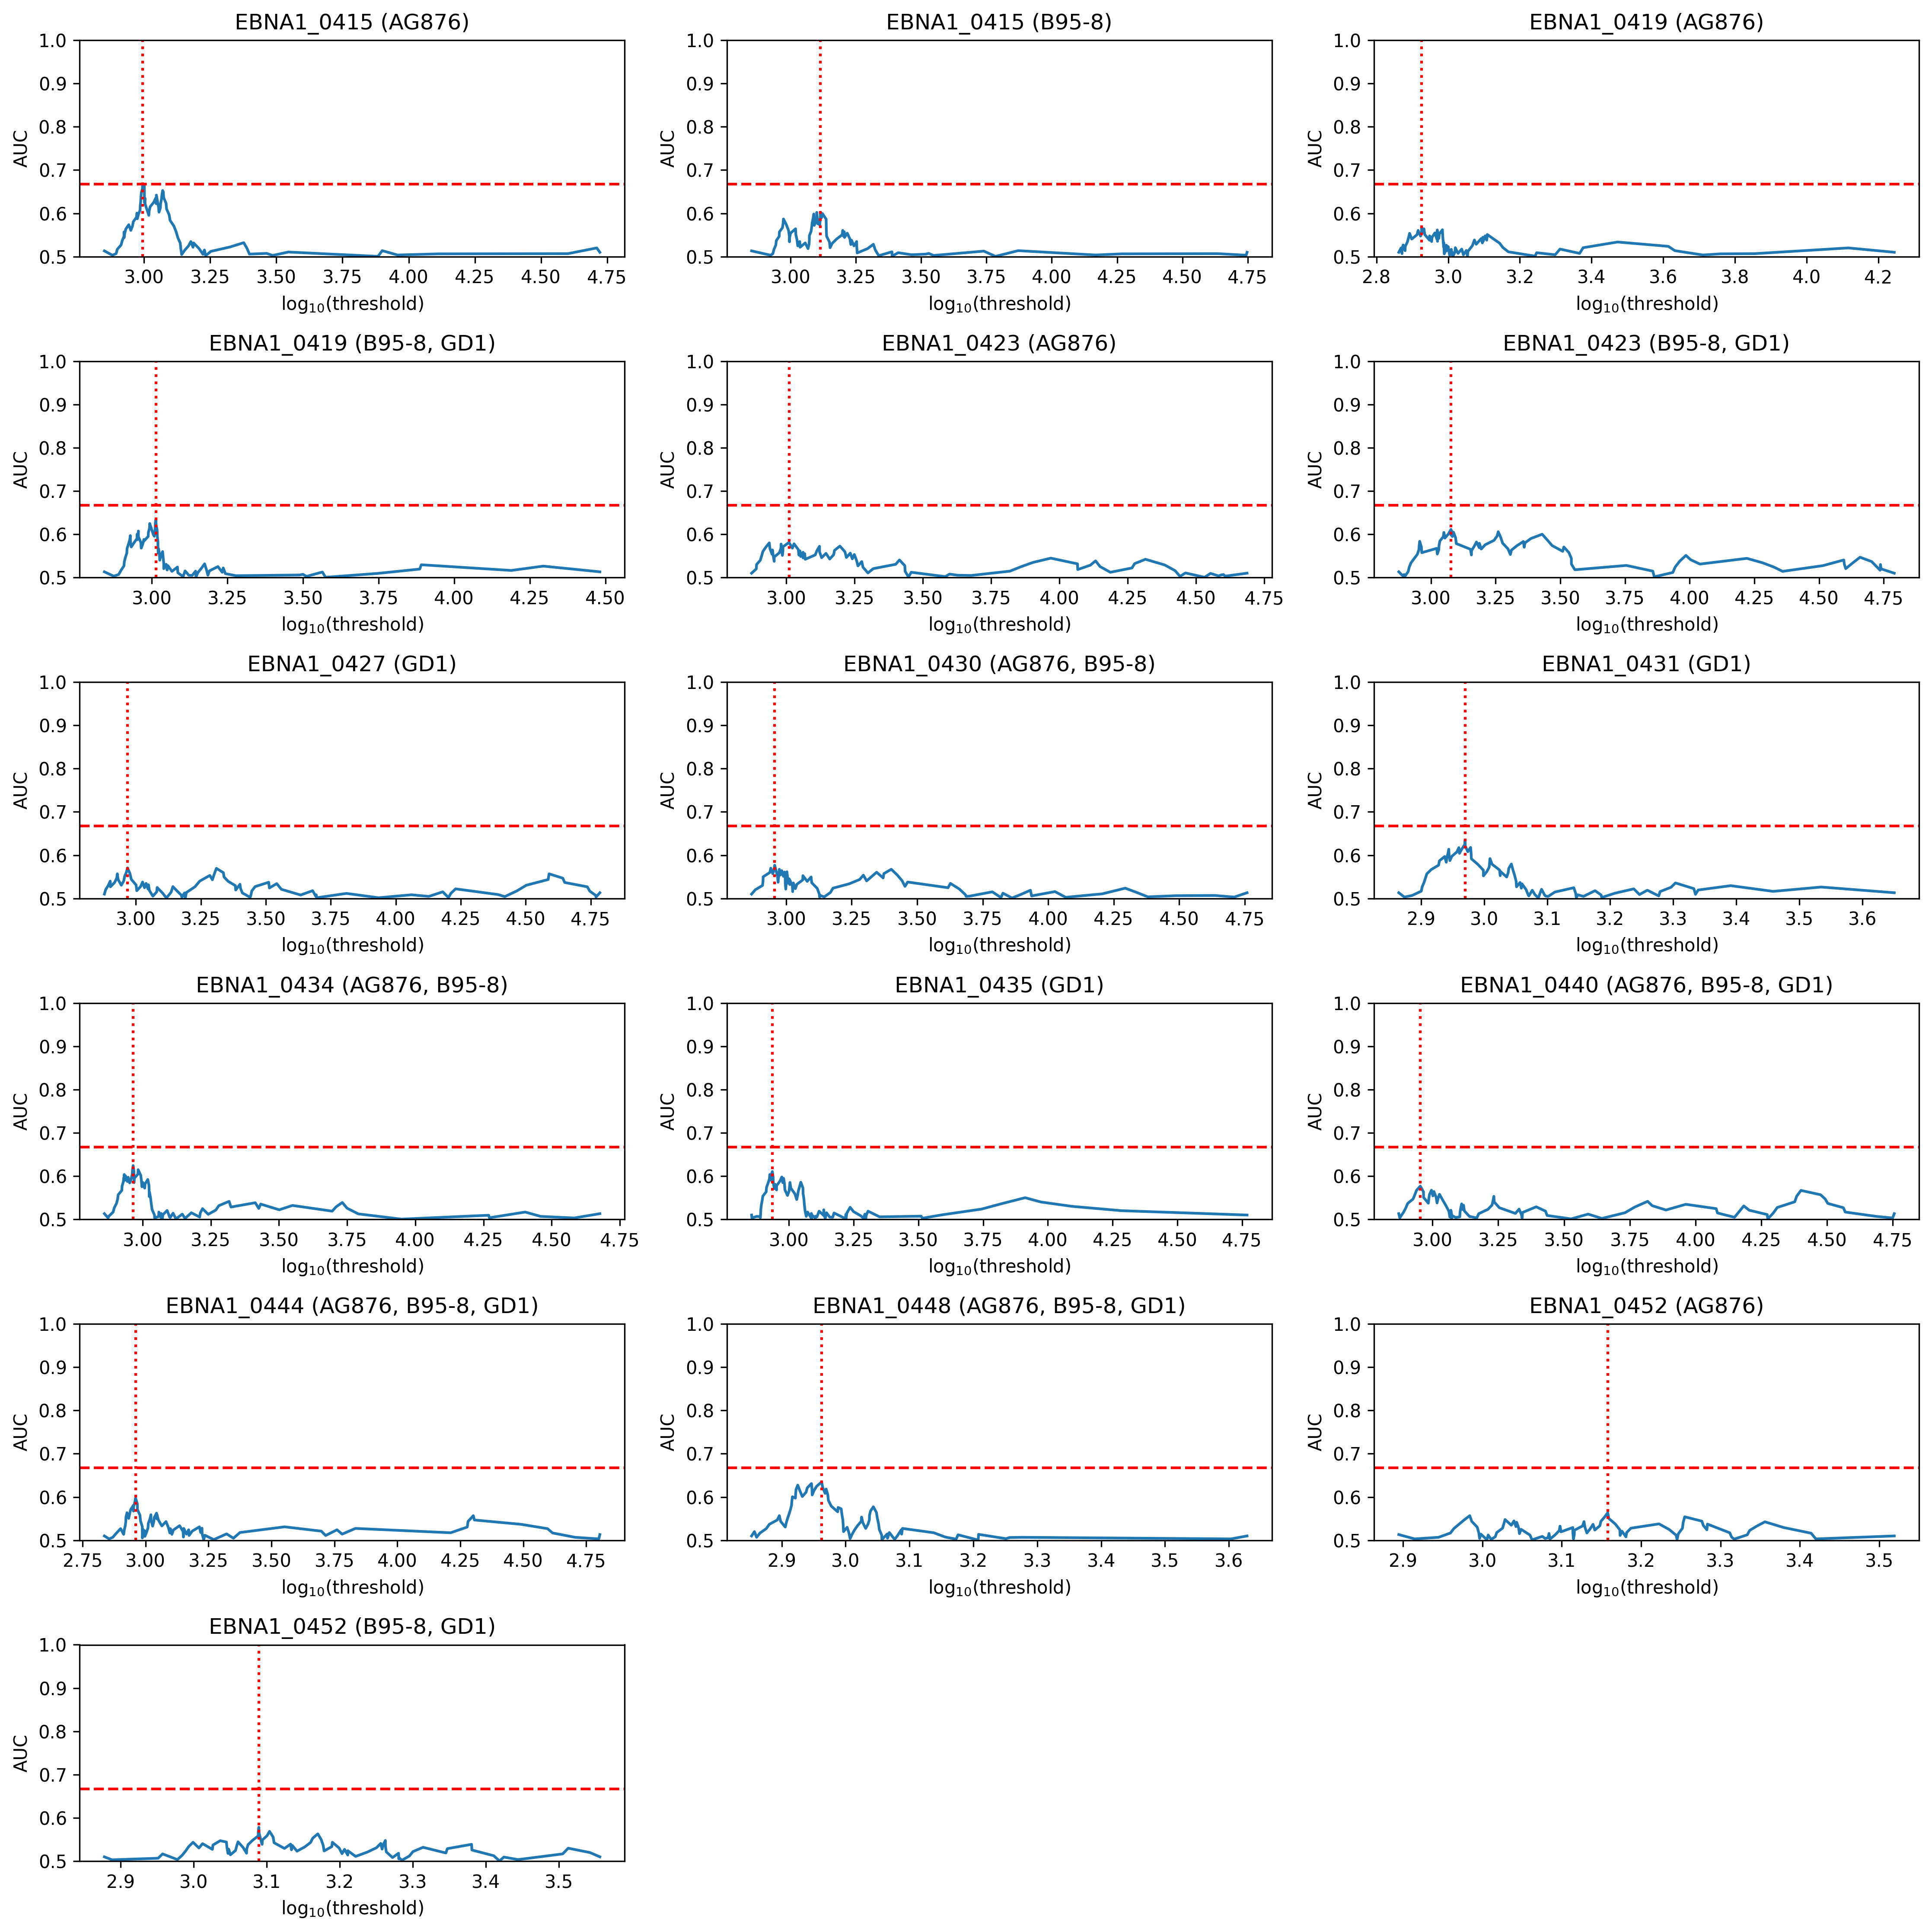

In [13]:
plot_signals_auc(smr, all_lower_bounds, auc)

**Gini decrease**

In [14]:
smr_gini = smr[['name', 'max_gini', 'gini_lower_bound', 'gini_upper_bound']]
smr_gini.columns = ['ID', 'maximum Gini decrease', 'lower bound', 'upper bound']
smr_gini.iloc[:, 2:] = np.round(smr_gini.iloc[:, 2:], 3)
smr_gini

ID  maximum Gini decrease  lower bound  \
0               EBNA1_0415 (AG876)               0.064806      987.000   
1               EBNA1_0415 (B95-8)               0.033205      939.000   
2               EBNA1_0419 (AG876)               0.014692      844.000   
3          EBNA1_0419 (B95-8, GD1)               0.038350      850.000   
4               EBNA1_0423 (AG876)               0.037293      866.667   
5          EBNA1_0423 (B95-8, GD1)               0.029202     1195.667   
6                 EBNA1_0427 (GD1)               0.018827      848.667   
7        EBNA1_0430 (AG876, B95-8)               0.032229      873.667   
8                 EBNA1_0431 (GD1)               0.042651      933.000   
9        EBNA1_0434 (AG876, B95-8)               0.038350      853.667   
10                EBNA1_0435 (GD1)               0.036614      844.333   
11  EBNA1_0440 (AG876, B95-8, GD1)               0.028232      899.000   
12  EBNA1_0444 (AG876, B95-8, GD1)               0.026969      912.667   
13  EBNA1_0448 (AG876, B95-8, GD1)               0.041667      841.667   
14              EBNA1_0452 (AG876)               0.018827      964.000   
15         EBNA1_0452 (B95-8, GD1)               0.013162     3256.333   

    upper bound  
0       997.667  
1       963.333  
2       845.667  
3       850.667  
4       871.500  
5      1197.333  
6       854.333  
7       889.333  
8       933.667  
9       856.000  
10      849.000  
11      924.333  
12      927.667  
13      848.333  
14      969.667  
15     3487.333

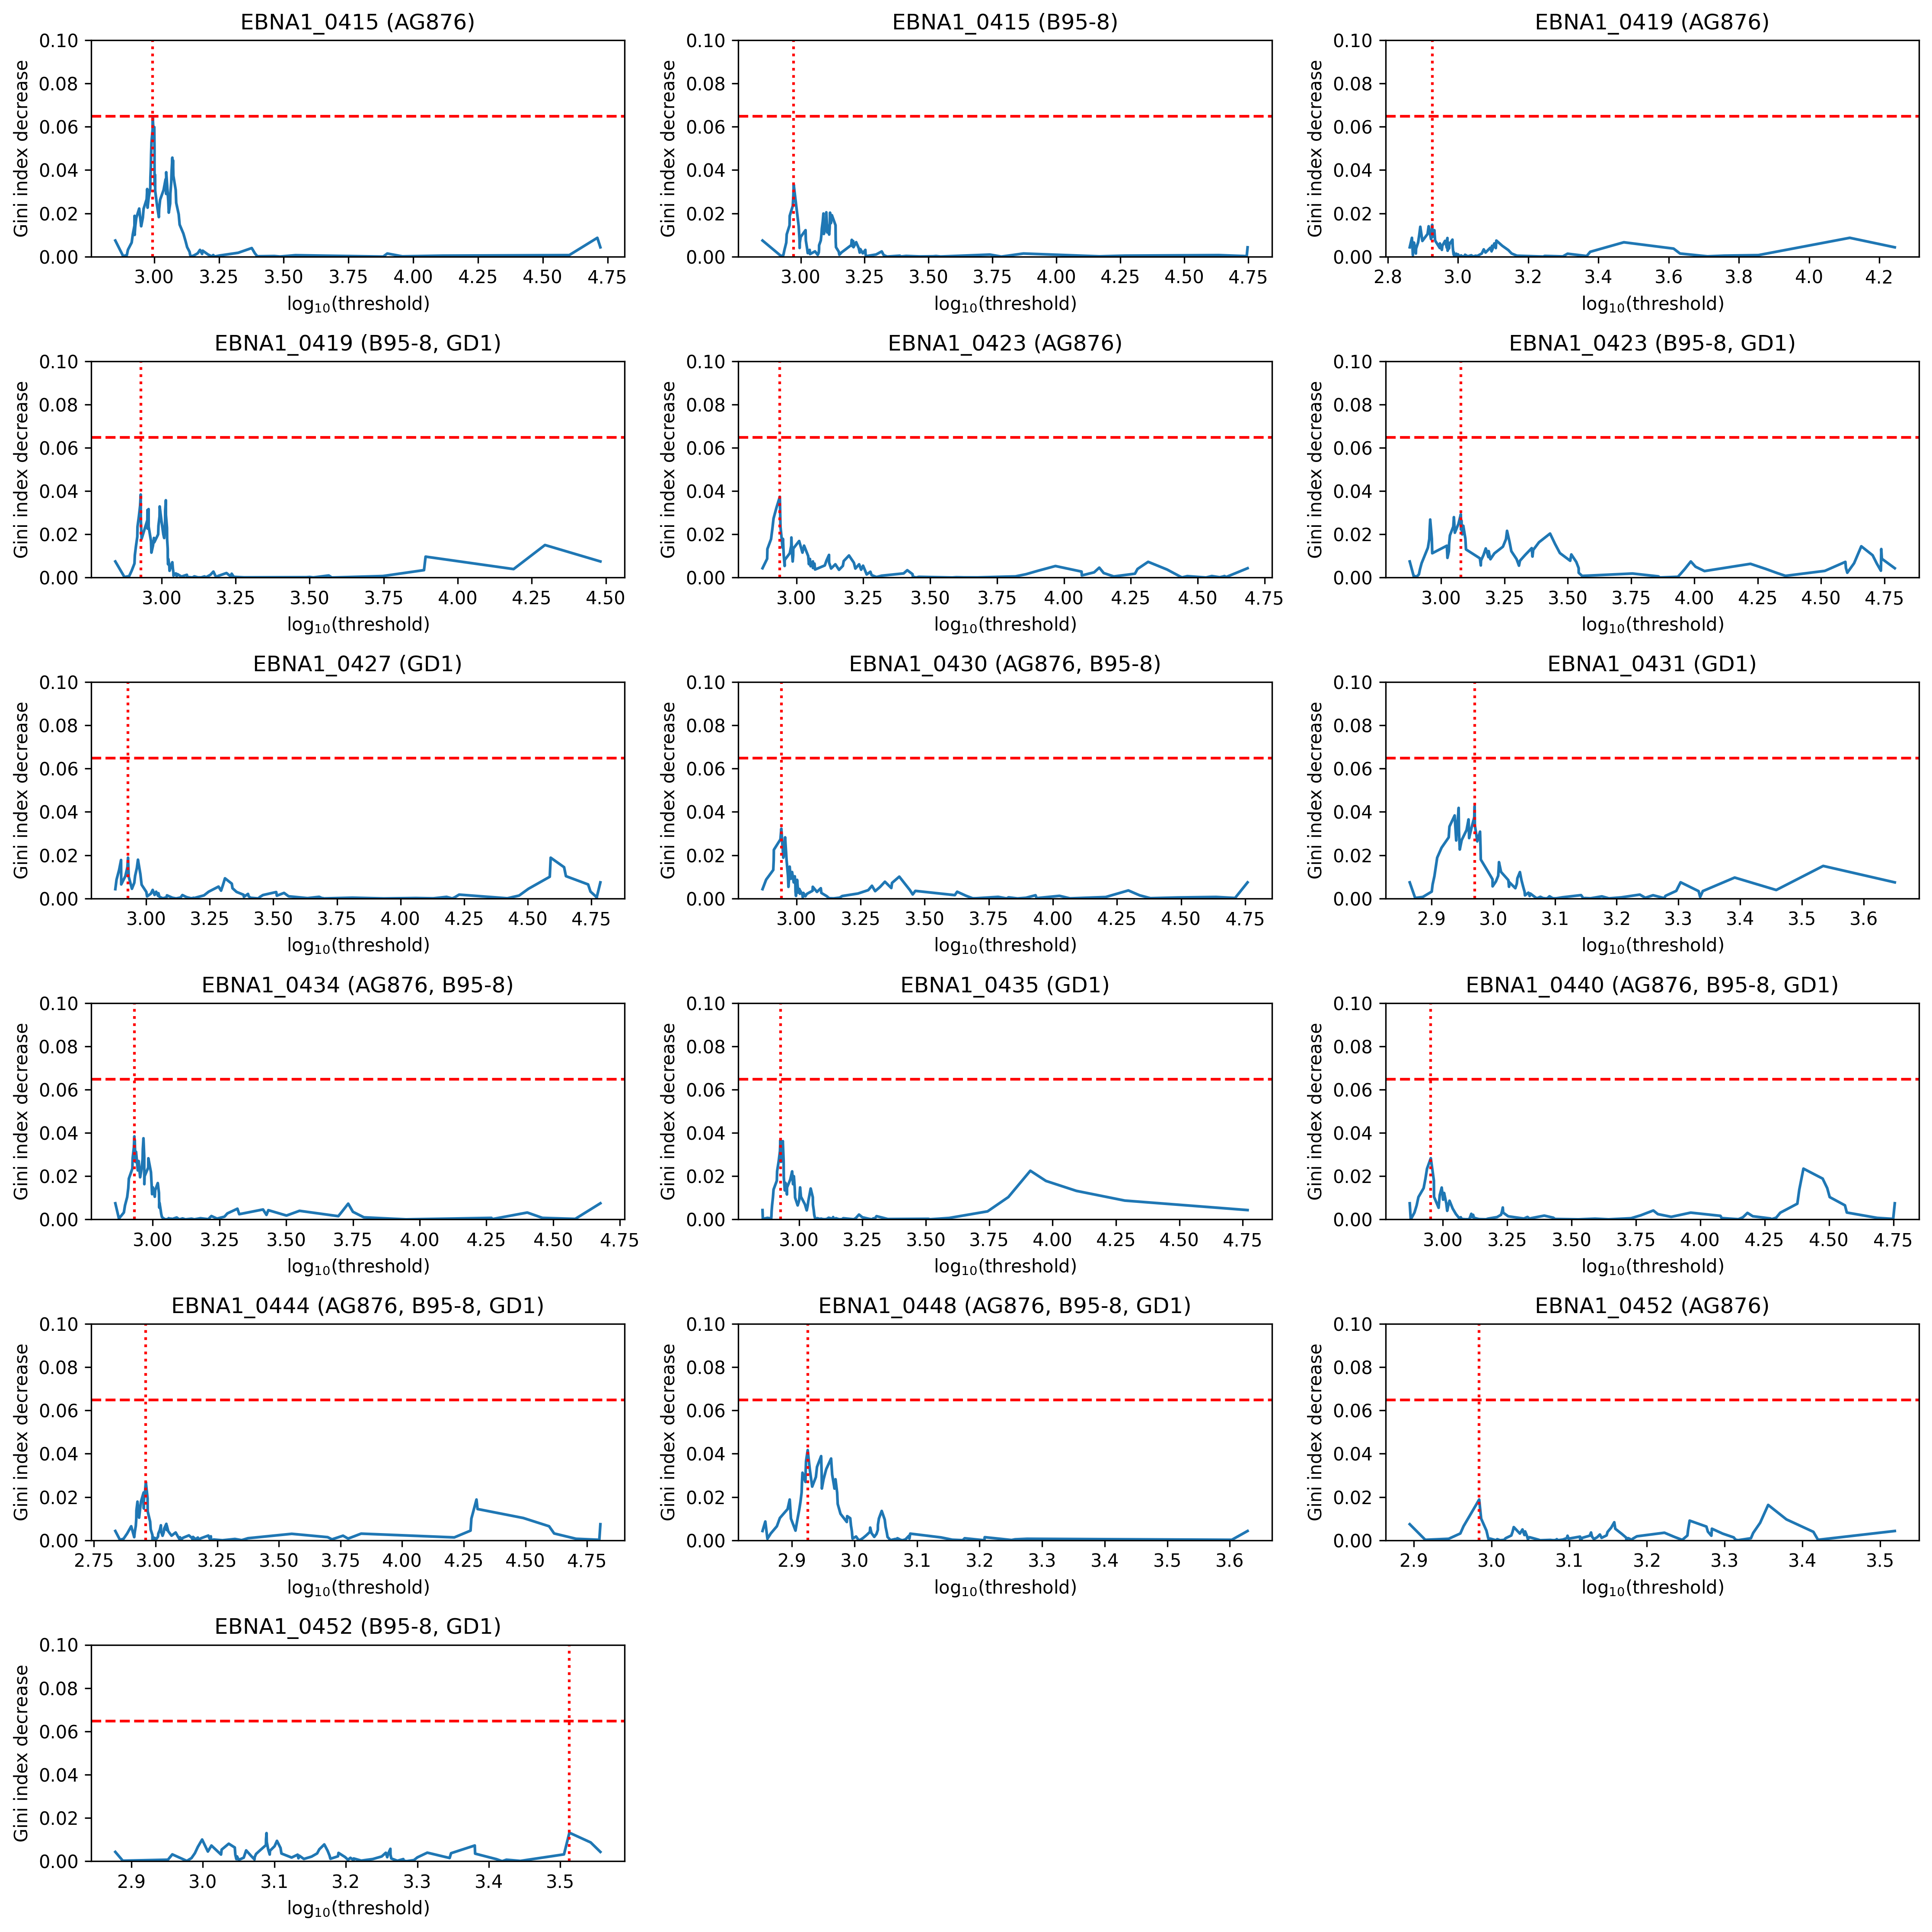

In [15]:
plot_signals_gini(smr, all_lower_bounds, gini)

**Summary of thresholds**

In [16]:
summarize_thresholds(smr)

Threshold  p-value  \
ID                             MAX AUC Method                                  
EBNA1_0415 (AG876)             0.643   Chi-square            987.00   0.0015   
                                       ROC01                1175.33   0.0081   
                                       Youden                987.00   0.0015   
                                       |Sen-Spe|            1138.67   0.0905   
                                       Gini                  987.00   0.0015   
                                       AUC (single thr.)     987.00   0.0015   
EBNA1_0415 (B95-8)             0.584   Chi-square            939.00   0.0344   
                                       ROC01                1302.00   0.0905   
                                       Youden               1302.00   0.0905   
                                       |Sen-Spe|            1302.00   0.0905   
                                       Gini                  939.00   0.0344   
                                       AUC (single thr.)    1302.00   0.0905   
EBNA1_0419 (AG876)             0.526   Chi-square            844.00   0.1789   
                                       ROC01                 964.00   0.3349   
                                       Youden                844.00   0.1789   
                                       |Sen-Spe|            1000.33   0.8296   
                                       Gini                  844.00   0.1789   
                                       AUC (single thr.)     844.00   0.1789   
EBNA1_0419 (B95-8, GD1)        0.601   Chi-square           1033.33   0.0207   
                                       ROC01                1033.33   0.0207   
                                       Youden               1033.33   0.0207   
                                       |Sen-Spe|            1051.33   0.4056   
                                       Gini                  850.00   0.0209   
                                       AUC (single thr.)    1033.33   0.0207   
EBNA1_0423 (AG876)             0.575   Chi-square            866.67   0.0270   
                                       ROC01                1571.67   0.2560   
                                       Youden               1023.50   0.1360   
                                       |Sen-Spe|            1715.33   0.4056   
                                       Gini                  866.67   0.0270   
                                       AUC (single thr.)    1023.50   0.1360   
EBNA1_0423 (B95-8, GD1)        0.580   Chi-square           1195.67   0.0404   
                                       ROC01                1820.00   0.0799   
                                       Youden               1195.67   0.0404   
                                       |Sen-Spe|            1892.33   0.2069   
                                       Gini                 1195.67   0.0404   
                                       AUC (single thr.)    1195.67   0.0404   
EBNA1_0427 (GD1)               0.508   Chi-square            928.67   0.1342   
                                       ROC01                3244.50   0.6159   
                                       Youden                928.67   0.1342   
                                       |Sen-Spe|            2003.00   0.4056   
                                       Gini                  848.67   0.1434   
                                       AUC (single thr.)     928.67   0.1342   
EBNA1_0430 (AG876, B95-8)      0.562   Chi-square            873.67   0.0448   
                                       ROC01                1158.67   0.4436   
                                       Youden                904.00   0.0560   
                                       |Sen-Spe|            1314.00   0.8296   
                                       Gini                  873.67   0.0448   
                                       AUC (single thr.)     904.00   0.0560   
EBNA1_0431 (GD1)               0.593   Chi-square         

In [17]:
summarize_thresholds2(smr)

Chi-squared             ROC01  \
ID                                                                   
EBNA1_0415 (AG876)                987.0 (0.0015)  1175.33 (0.0081)   
EBNA1_0415 (B95-8)                939.0 (0.0344)   1302.0 (0.0905)   
EBNA1_0419 (AG876)                844.0 (0.1789)    964.0 (0.3349)   
EBNA1_0419 (B95-8, GD1)         1033.33 (0.0207)  1033.33 (0.0207)   
EBNA1_0423 (AG876)                866.67 (0.027)   1571.67 (0.256)   
EBNA1_0423 (B95-8, GD1)         1195.67 (0.0404)   1820.0 (0.0799)   
EBNA1_0427 (GD1)                 928.67 (0.1342)   3244.5 (0.6159)   
EBNA1_0430 (AG876, B95-8)        873.67 (0.0448)  1158.67 (0.4436)   
EBNA1_0431 (GD1)                  933.0 (0.0115)  1021.67 (0.1295)   
EBNA1_0434 (AG876, B95-8)        923.33 (0.0188)  1044.67 (0.1295)   
EBNA1_0435 (GD1)                 863.33 (0.0226)   1112.0 (0.1668)   
EBNA1_0440 (AG876, B95-8, GD1)     899.0 (0.056)  1711.67 (0.4386)   
EBNA1_0444 (AG876, B95-8, GD1)   912.67 (0.0527)  1105.67 (0.3416)   
EBNA1_0448 (AG876, B95-8, GD1)    841.67 (0.013)   917.33 (0.0173)   
EBNA1_0452 (AG876)                964.0 (0.1434)  1438.67 (0.3172)   
EBNA1_0452 (B95-8, GD1)         1227.67 (0.1935)  1478.67 (0.3357)   

                               Youden's J statistic         |Sen-Spe|  \
ID                                                                      
EBNA1_0415 (AG876)                   987.0 (0.0015)  1138.67 (0.0905)   
EBNA1_0415 (B95-8)                  1302.0 (0.0905)   1302.0 (0.0905)   
EBNA1_0419 (AG876)                   844.0 (0.1789)  1000.33 (0.8296)   
EBNA1_0419 (B95-8, GD1)            1033.33 (0.0207)  1051.33 (0.4056)   
EBNA1_0423 (AG876)                   1023.5 (0.136)  1715.33 (0.4056)   
EBNA1_0423 (B95-8, GD1)            1195.67 (0.0404)  1892.33 (0.2069)   
EBNA1_0427 (GD1)                    928.67 (0.1342)   2003.0 (0.4056)   
EBNA1_0430 (AG876, B95-8)             904.0 (0.056)   1314.0 (0.8296)   
EBNA1_0431 (GD1)                     933.0 (0.0115)  1104.67 (0.2069)   
EBNA1_0434 (AG876, B95-8)           923.33 (0.0188)   1083.0 (0.8296)   
EBNA1_0435 (GD1)                    863.33 (0.0226)  1143.67 (0.5185)   
EBNA1_0440 (AG876, B95-8, GD1)        899.0 (0.056)  1625.67 (0.8296)   
EBNA1_0444 (AG876, B95-8, GD1)      912.67 (0.0527)  1125.67 (0.5185)   
EBNA1_0448 (AG876, B95-8, GD1)      917.33 (0.0173)   990.33 (0.5185)   
EBNA1_0452 (AG876)                 1438.67 (0.3172)   1306.0 (0.8296)   
EBNA1_0452 (B95-8, GD1)            1227.67 (0.1935)  1384.67 (0.8296)   

                                            Gini AUC (single thr.)  
ID                                                                  
EBNA1_0415 (AG876)                987.0 (0.0015)    987.0 (0.0015)  
EBNA1_0415 (B95-8)                939.0 (0.0344)   1302.0 (0.0905)  
EBNA1_0419 (AG876)                844.0 (0.1789)    844.0 (0.1789)  
EBNA1_0419 (B95-8, GD1)           850.0 (0.0209)  1033.33 (0.0207)  
EBNA1_0423 (AG876)                866.67 (0.027)    1023.5 (0.136)  
EBNA1_0423 (B95-8, GD1)         1195.67 (0.0404)  1195.67 (0.0404)  
EBNA1_0427 (GD1)                 848.67 (0.1434)   928.67 (0.1342)  
EBNA1_0430 (AG876, B95-8)        873.67 (0.0448)     904.0 (0.056)  
EBNA1_0431 (GD1)                  933.0 (0.0115)    933.0 (0.0115)  
EBNA1_0434 (AG876, B95-8)        853.67 (0.0209)   923.33 (0.0188)  
EBNA1_0435 (GD1)                 844.33 (0.0228)   863.33 (0.0226)  
EBNA1_0440 (AG876, B95-8, GD1)     899.0 (0.056)     899.0 (0.056)  
EBNA1_0444 (AG876, B95-8, GD1)   912.67 (0.0527)   912.67 (0.0527)  
EBNA1_0448 (AG876, B95-8, GD1)    841.67 (0.013)   917.33 (0.0173)  
EBNA1_0452 (AG876)                964.0 (0.1434)  1438.67 (0.3172)  
EBNA1_0452 (B95-8, GD1)         3256.33 (0.3455)  1227.67 (0.1935)

In [18]:
summarize_sen_spe(smr)

sensitivity                             \
                               Chi-squared ROC01 Youden's J statistic   
name                                                                    
EBNA1_0415 (AG876)                    0.44  0.70                 0.44   
EBNA1_0415 (B95-8)                    0.20  0.60                 0.60   
EBNA1_0419 (AG876)                    0.24  0.44                 0.24   
EBNA1_0419 (B95-8, GD1)               0.56  0.56                 0.56   
EBNA1_0423 (AG876)                    0.16  0.54                 0.32   
EBNA1_0423 (B95-8, GD1)               0.38  0.58                 0.38   
EBNA1_0427 (GD1)                      0.22  0.68                 0.22   
EBNA1_0430 (AG876, B95-8)             0.14  0.50                 0.18   
EBNA1_0431 (GD1)                      0.40  0.50                 0.40   
EBNA1_0434 (AG876, B95-8)             0.38  0.50                 0.38   
EBNA1_0435 (GD1)                      0.30  0.54                 0.30   
EBNA1_0440 (AG876, B95-8, GD1)        0.18  0.58                 0.18   
EBNA1_0444 (AG876, B95-8, GD1)        0.30  0.52                 0.30   
EBNA1_0448 (AG876, B95-8, GD1)        0.36  0.48                 0.48   
EBNA1_0452 (AG876)                    0.14  0.68                 0.68   
EBNA1_0452 (B95-8, GD1)               0.42  0.60                 0.42   

                                                                 specifiticy  \
                               |Sen-Spe|  Gini AUC (single thr.) Chi-squared   
name                                                                           
EBNA1_0415 (AG876)                  0.60  0.44              0.44        0.89   
EBNA1_0415 (B95-8)                  0.60  0.20              0.60        0.97   
EBNA1_0419 (AG876)                  0.52  0.24              0.24        0.89   
EBNA1_0419 (B95-8, GD1)             0.56  0.22              0.56        0.71   
EBNA1_0423 (AG876)                  0.56  0.16              0.32        1.00   
EBNA1_0423 (B95-8, GD1)             0.58  0.38              0.38        0.84   
EBNA1_0427 (GD1)                    0.44  0.14              0.22        0.92   
EBNA1_0430 (AG876, B95-8)           0.52  0.14              0.18        1.00   
EBNA1_0431 (GD1)                    0.58  0.40              0.40        0.87   
EBNA1_0434 (AG876, B95-8)           0.52  0.22              0.38        0.87   
EBNA1_0435 (GD1)                    0.54  0.26              0.30        0.92   
EBNA1_0440 (AG876, B95-8, GD1)      0.52  0.18              0.18        0.97   
EBNA1_0444 (AG876, B95-8, GD1)      0.54  0.30              0.30        0.89   
EBNA1_0448 (AG876, B95-8, GD1)      0.54  0.36              0.48        0.89   
EBNA1_0452 (AG876)                  0.52  0.14              0.68        0.97   
EBNA1_0452 (B95-8, GD1)             0.52  0.94              0.42        0.74   

                                                                           \
                               ROC01 Youden's J statistic |Sen-Spe|  Gini   
name                                                                        
EBNA1_0415 (AG876)              0.61                 0.89      0.61  0.89   
EBNA1_0415 (B95-8)              0.61                 0.61      0.61  0.97   
EBNA1_0419 (AG876)              0.68                 0.89      0.53  0.89   
EBNA1_0419 (B95-8, GD1)         0.71                 0.71      0.55  0.97   
EBNA1_0423 (AG876)              0.61                 0.84      0.55  1.00   
EBNA1_0423 (B95-8, GD1)         0.63                 0.84      0.58  0.84   
EBNA1_0427 (GD1)                0.39                 0.92      0.45  0.97   
EBNA1_0430 (AG876, B95-8)       0.61                 0.97      0.53  1.00   
EBNA1_0431 (GD1)                0.68                 0.87      0.58  0.87   
EBNA1_0434 (AG876, B95-8)       0.68                 0.87      0.53  0.97   
EBNA1_0435 (GD1)                0.63                 0.92      0.55  0.95   
EBNA1_0440 (AG876, B95-8, GD1)  0.53        

# Confidence intervals

In [19]:
smr_copy = smr[['name', 'proportion_min_g1', 'test_g1_prop_above', 'proportion_max_g1', 'proportion_min_g2', 'test_g2_prop_above', 'proportion_max_g2']]
smr_copy.columns = ['ID', 'healthy (min)', 'healthy (mean)', 'healthy (max)', 'unifected CFS (min)', 'uninfected CFS (mean)', 'uninfected CFS (max)']
smr_copy.iloc[:, 1:] = np.round(smr_copy.iloc[:, 1:], 2)
smr_copy

ID  healthy (min)  healthy (mean)  \
0               EBNA1_0415 (AG876)           0.42            0.56   
1               EBNA1_0415 (B95-8)           0.69            0.80   
2               EBNA1_0419 (AG876)           0.64            0.76   
3          EBNA1_0419 (B95-8, GD1)           0.30            0.44   
4               EBNA1_0423 (AG876)           0.74            0.84   
5          EBNA1_0423 (B95-8, GD1)           0.49            0.62   
6                 EBNA1_0427 (GD1)           0.67            0.78   
7        EBNA1_0430 (AG876, B95-8)           0.76            0.86   
8                 EBNA1_0431 (GD1)           0.46            0.60   
9        EBNA1_0434 (AG876, B95-8)           0.49            0.62   
10                EBNA1_0435 (GD1)           0.57            0.70   
11  EBNA1_0440 (AG876, B95-8, GD1)           0.71            0.82   
12  EBNA1_0444 (AG876, B95-8, GD1)           0.57            0.70   
13  EBNA1_0448 (AG876, B95-8, GD1)           0.51            0.64   
14              EBNA1_0452 (AG876)           0.76            0.86   
15         EBNA1_0452 (B95-8, GD1)           0.44            0.58   

    healthy (max)  unifected CFS (min)  uninfected CFS (mean)  \
0            0.70                 0.80                   0.89   
1            0.91                 0.92                   0.97   
2            0.88                 0.80                   0.89   
3            0.58                 0.57                   0.71   
4            0.94                 1.00                   1.00   
5            0.75                 0.73                   0.84   
6            0.89                 0.84                   0.92   
7            0.96                 1.00                   1.00   
8            0.74                 0.76                   0.87   
9            0.75                 0.76                   0.87   
10           0.83                 0.84                   0.92   
11           0.93                 0.92                   0.97   
12           0.83                 0.80                   0.89   
13           0.77                 0.80                   0.89   
14           0.96                 0.92                   0.97   
15           0.72                 0.60                   0.74   

    uninfected CFS (max)  
0                   0.99  
1                   1.00  
2                   0.99  
3                   0.85  
4                   1.00  
5                   0.96  
6                   1.00  
7                   1.00  
8                   0.98  
9                   0.98  
10                  1.00  
11                  1.00  
12                  0.99  
13                  0.99  
14                  1.00  
15                  0.88

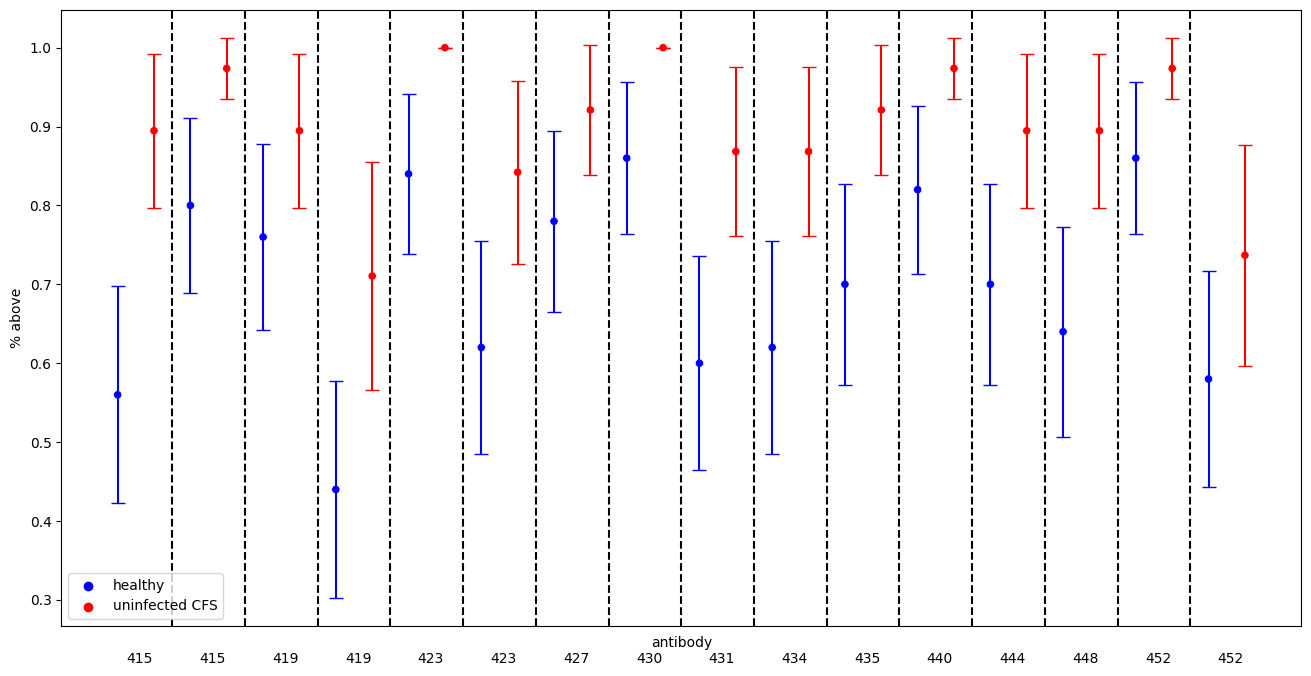

In [20]:
plot_conf_int(smr, 'healthy', 'uninfected CFS', True)

# Multiple testing correction

In [21]:
ag876 = 'FEYHQEGGPDGEPDMPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWYG'
ag876_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
ag876_target = 16
b958 = 'FEYHQEGGPDGEPDVPPGAIEQGPADDPGEGPSTGPRGQGDGGRRKKGGWFG'
b958_stop = [15, 19, 23, 30, 34, 40, 44, 48, 52]
b958_target = 16
gd1 = 'QEGGPDGEPDVPPGAIEQGPTDDPGEGPSTGPRGQGDGGRRKKGGWFG'
gd1_stop = [15, 19, 23, 27, 31, 36, 40, 44, 48]
gd1_target = 12

In [22]:
adj_p_values_bonf = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'bonferroni')[1])
adj_p_values_bh = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_bh')[1])
adj_p_values_by = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_by')[1])
adj_p_values_bky = -np.log10(multipletests(np.array(smr['min_p_value']), method = 'fdr_tsbky')[1])

In [23]:
adj_p_values = [adj_p_values_bonf, adj_p_values_bh, adj_p_values_by, adj_p_values_bky]
correction_types = ['Bonferroni' ,'Benjamini-Hochberg', 'Benjamini-Yekutieli', '2-stage Benjamini-Krieger-Yekutieli']
strains = ['AG876', 'B95-8', 'GD1']
strain_seqs = [ag876, b958, gd1]
strain_stops = [ag876_stop, b958_stop, gd1_stop]
strain_targets = [ag876_target, b958_target, gd1_target]

In [24]:
pvals = np.round(pd.DataFrame({k:v for k,v in zip(correction_types, adj_p_values)}), 3)
pvals.insert(0, 'ID', smr.name)
pvals

ID  Bonferroni  Benjamini-Hochberg  \
0               EBNA1_0415 (AG876)       1.618               1.618   
1               EBNA1_0415 (B95-8)       0.259               1.162   
2               EBNA1_0419 (AG876)      -0.000               0.719   
3          EBNA1_0419 (B95-8, GD1)       0.480               1.219   
4               EBNA1_0423 (AG876)       0.365               1.210   
5          EBNA1_0423 (B95-8, GD1)       0.190               1.145   
6                 EBNA1_0427 (GD1)      -0.000               0.785   
7        EBNA1_0430 (AG876, B95-8)       0.145               1.145   
8                 EBNA1_0431 (GD1)       0.735               1.219   
9        EBNA1_0434 (AG876, B95-8)       0.523               1.219   
10                EBNA1_0435 (GD1)       0.441               1.219   
11  EBNA1_0440 (AG876, B95-8, GD1)       0.048               1.127   
12  EBNA1_0444 (AG876, B95-8, GD1)       0.074               1.127   
13  EBNA1_0448 (AG876, B95-8, GD1)       0.683               1.219   
14              EBNA1_0452 (AG876)      -0.000               0.785   
15         EBNA1_0452 (B95-8, GD1)      -0.000               0.713   

    Benjamini-Yekutieli  2-stage Benjamini-Krieger-Yekutieli  
0                 1.089                                1.624  
1                 0.633                                1.169  
2                 0.190                                0.726  
3                 0.690                                1.226  
4                 0.681                                1.217  
5                 0.616                                1.151  
6                 0.256                                0.792  
7                 0.616                                1.151  
8                 0.690                                1.226  
9                 0.690                                1.226  
10                0.690                                1.226  
11                0.598                                1.134  
12                0.598                                1.134  
13                0.690                                1.226  
14                0.256                                0.792  
15                0.184                                0.720

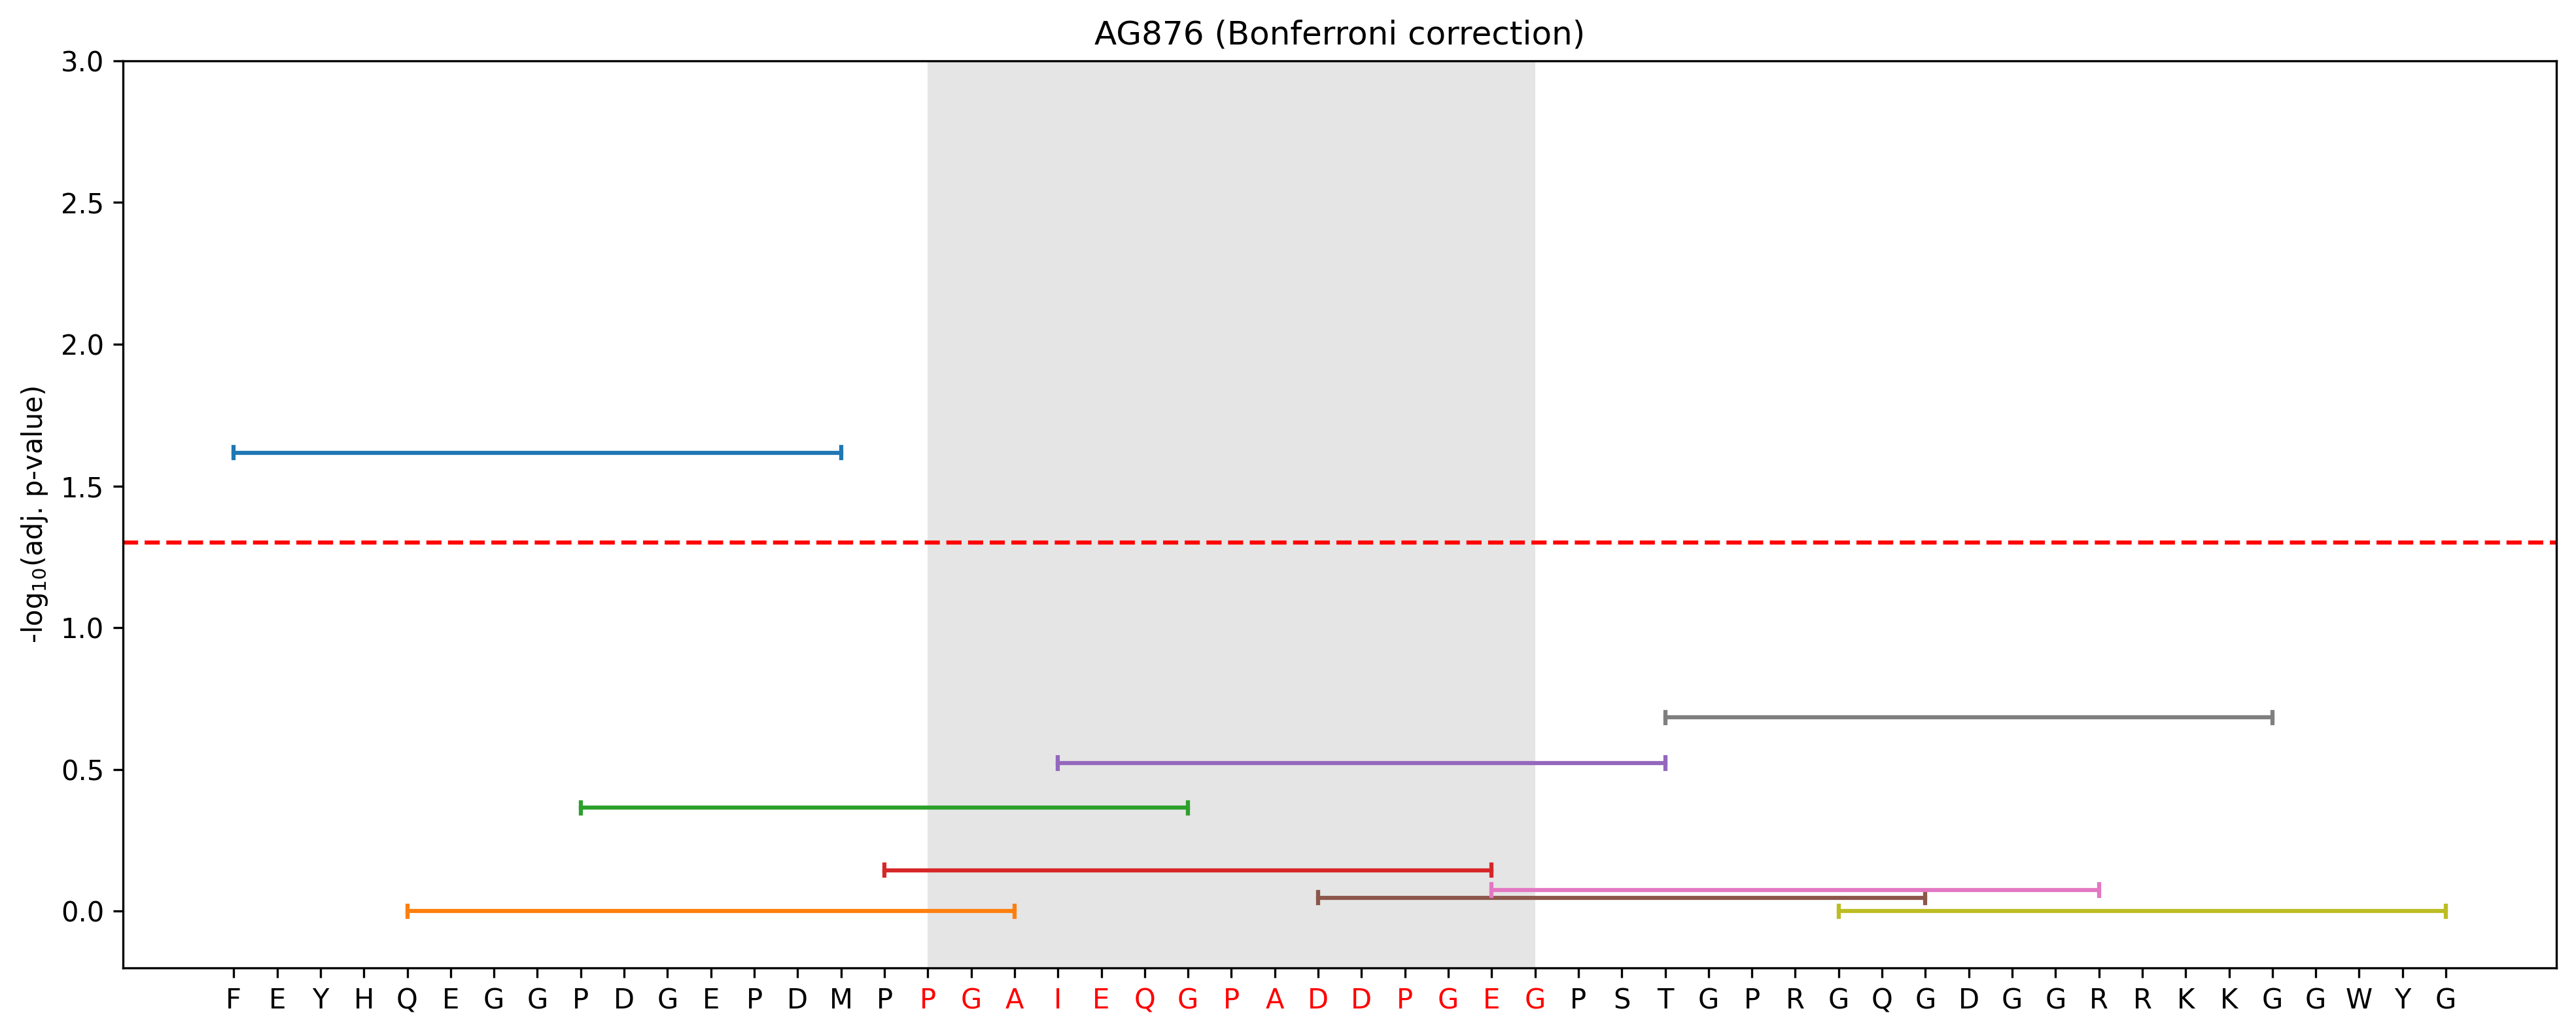

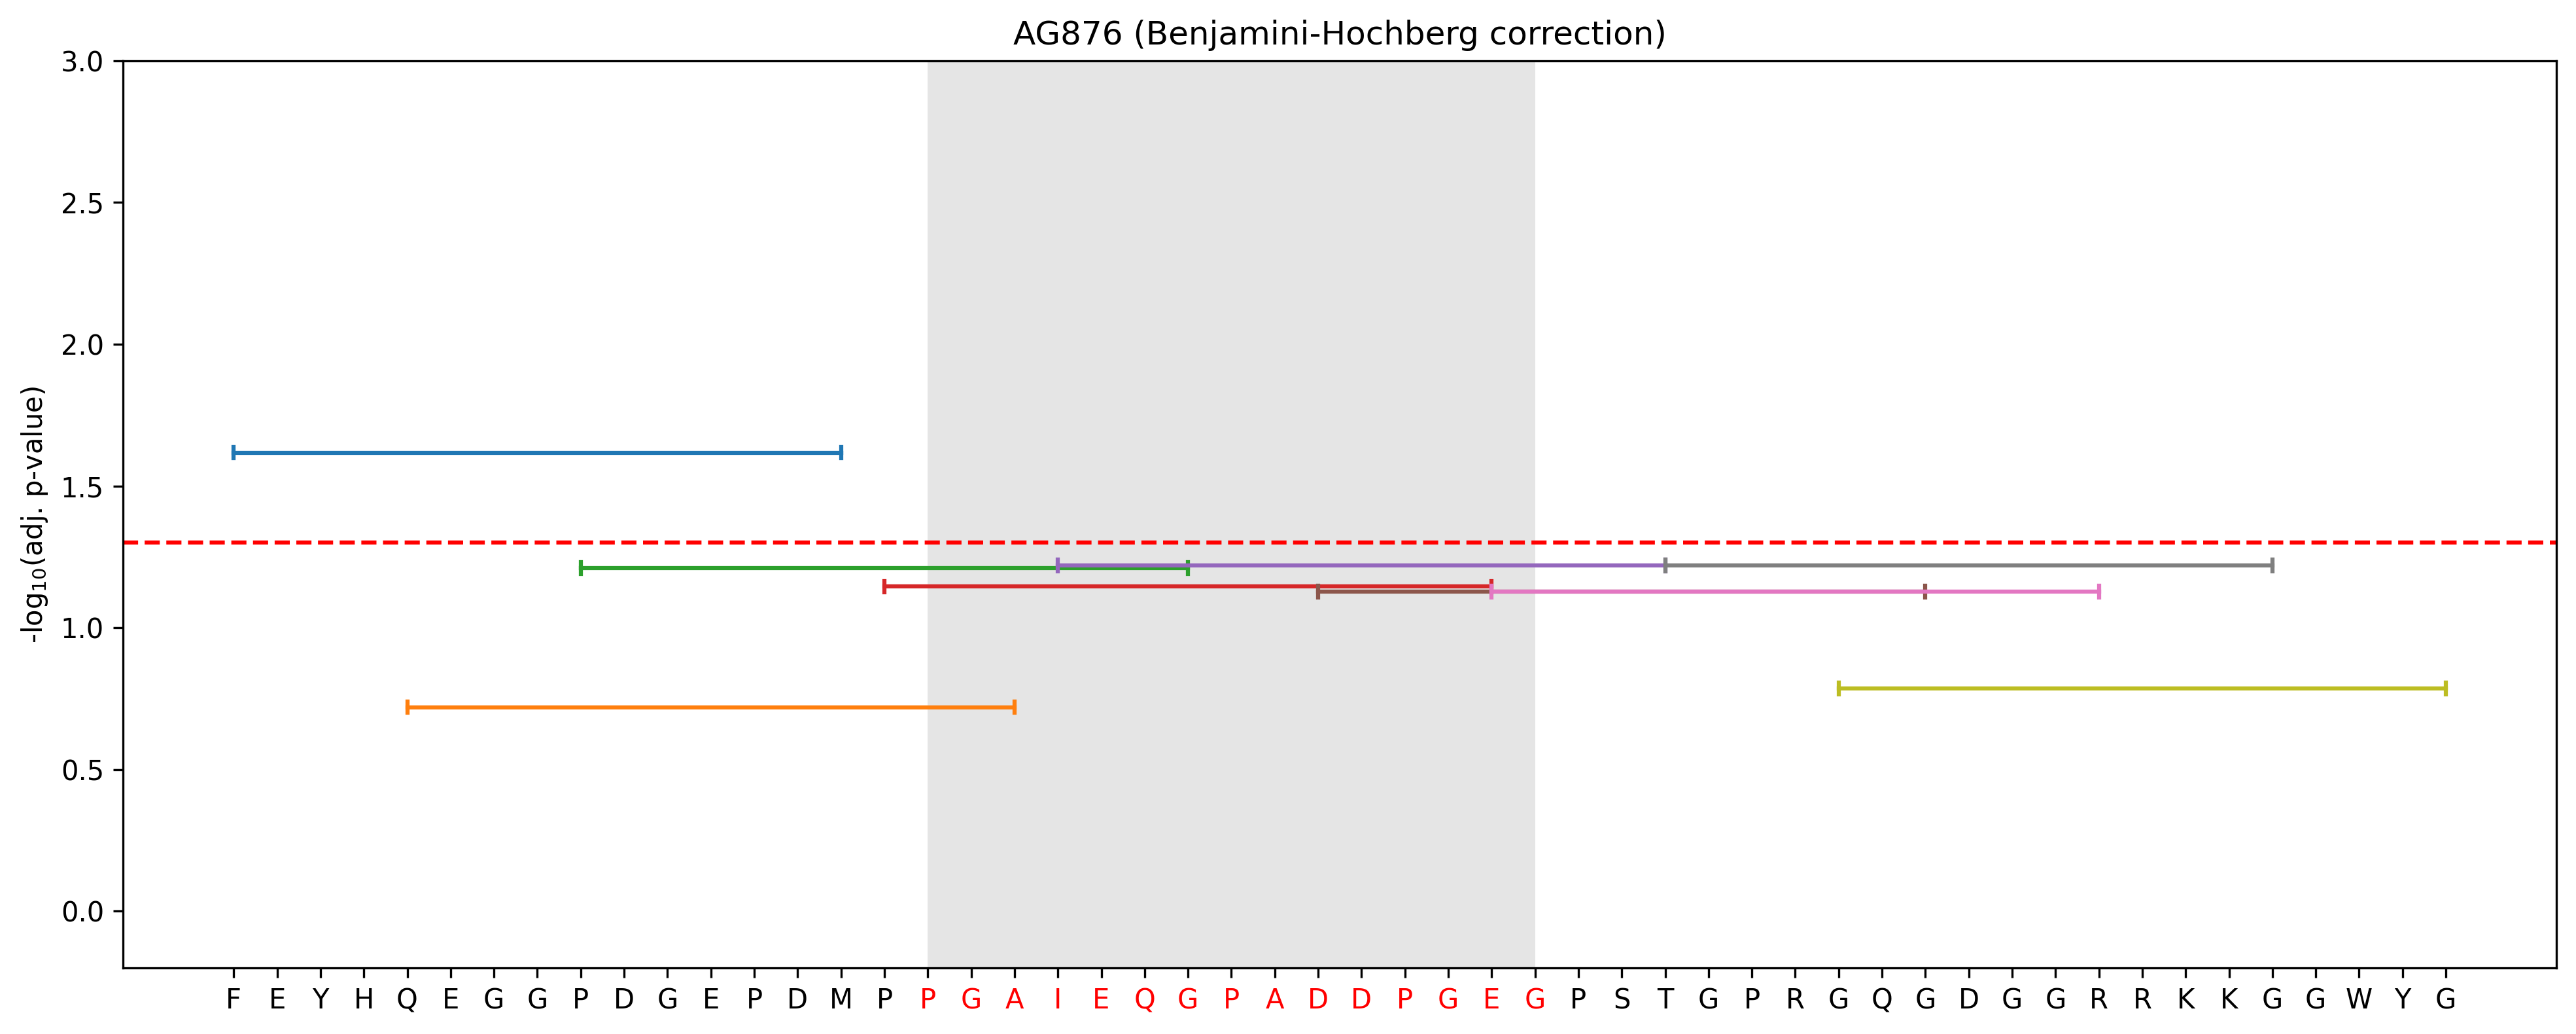

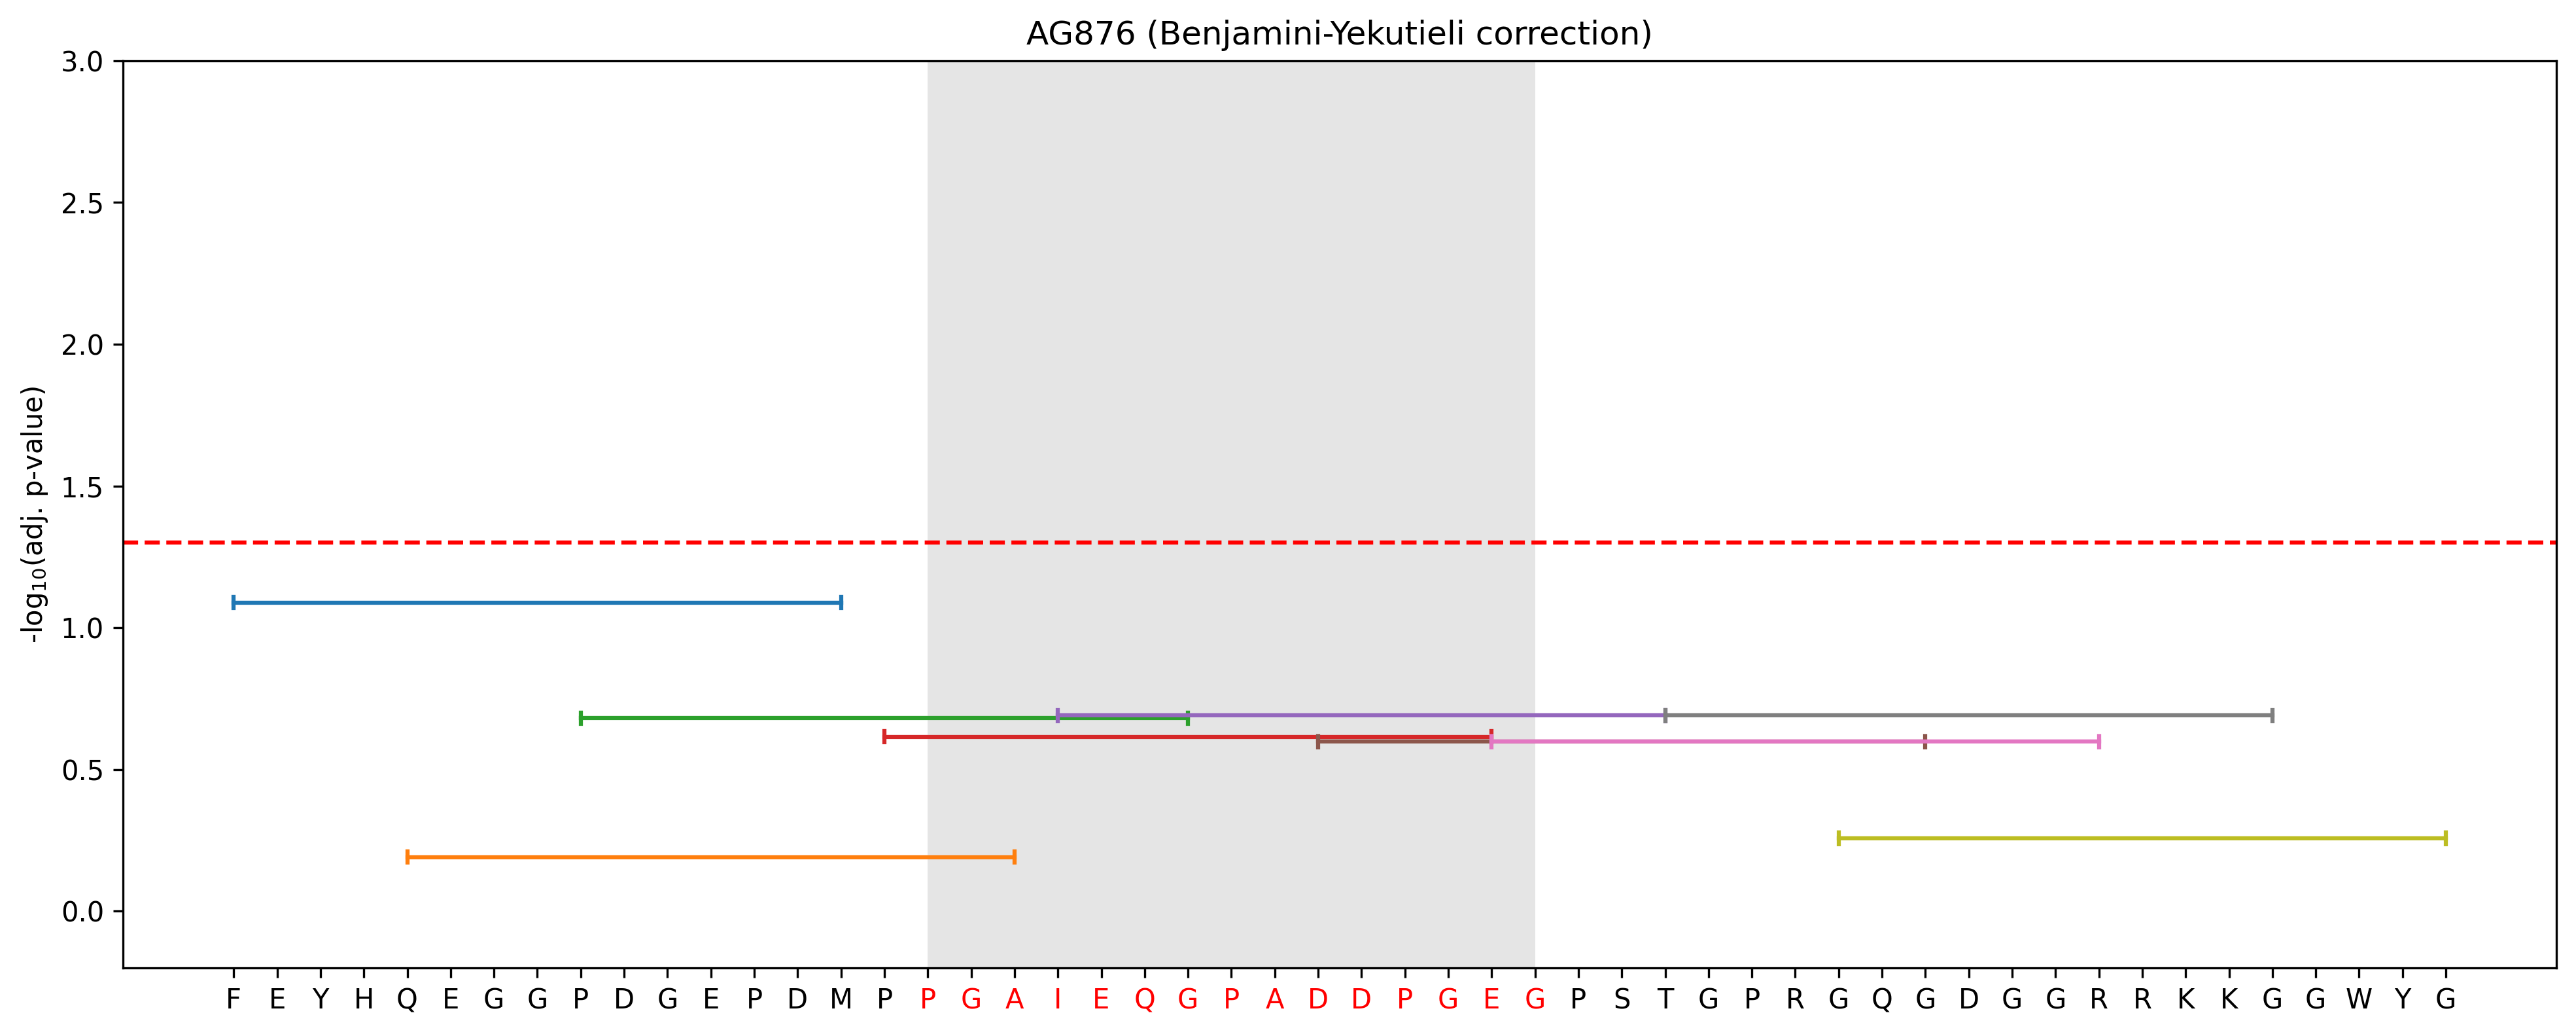

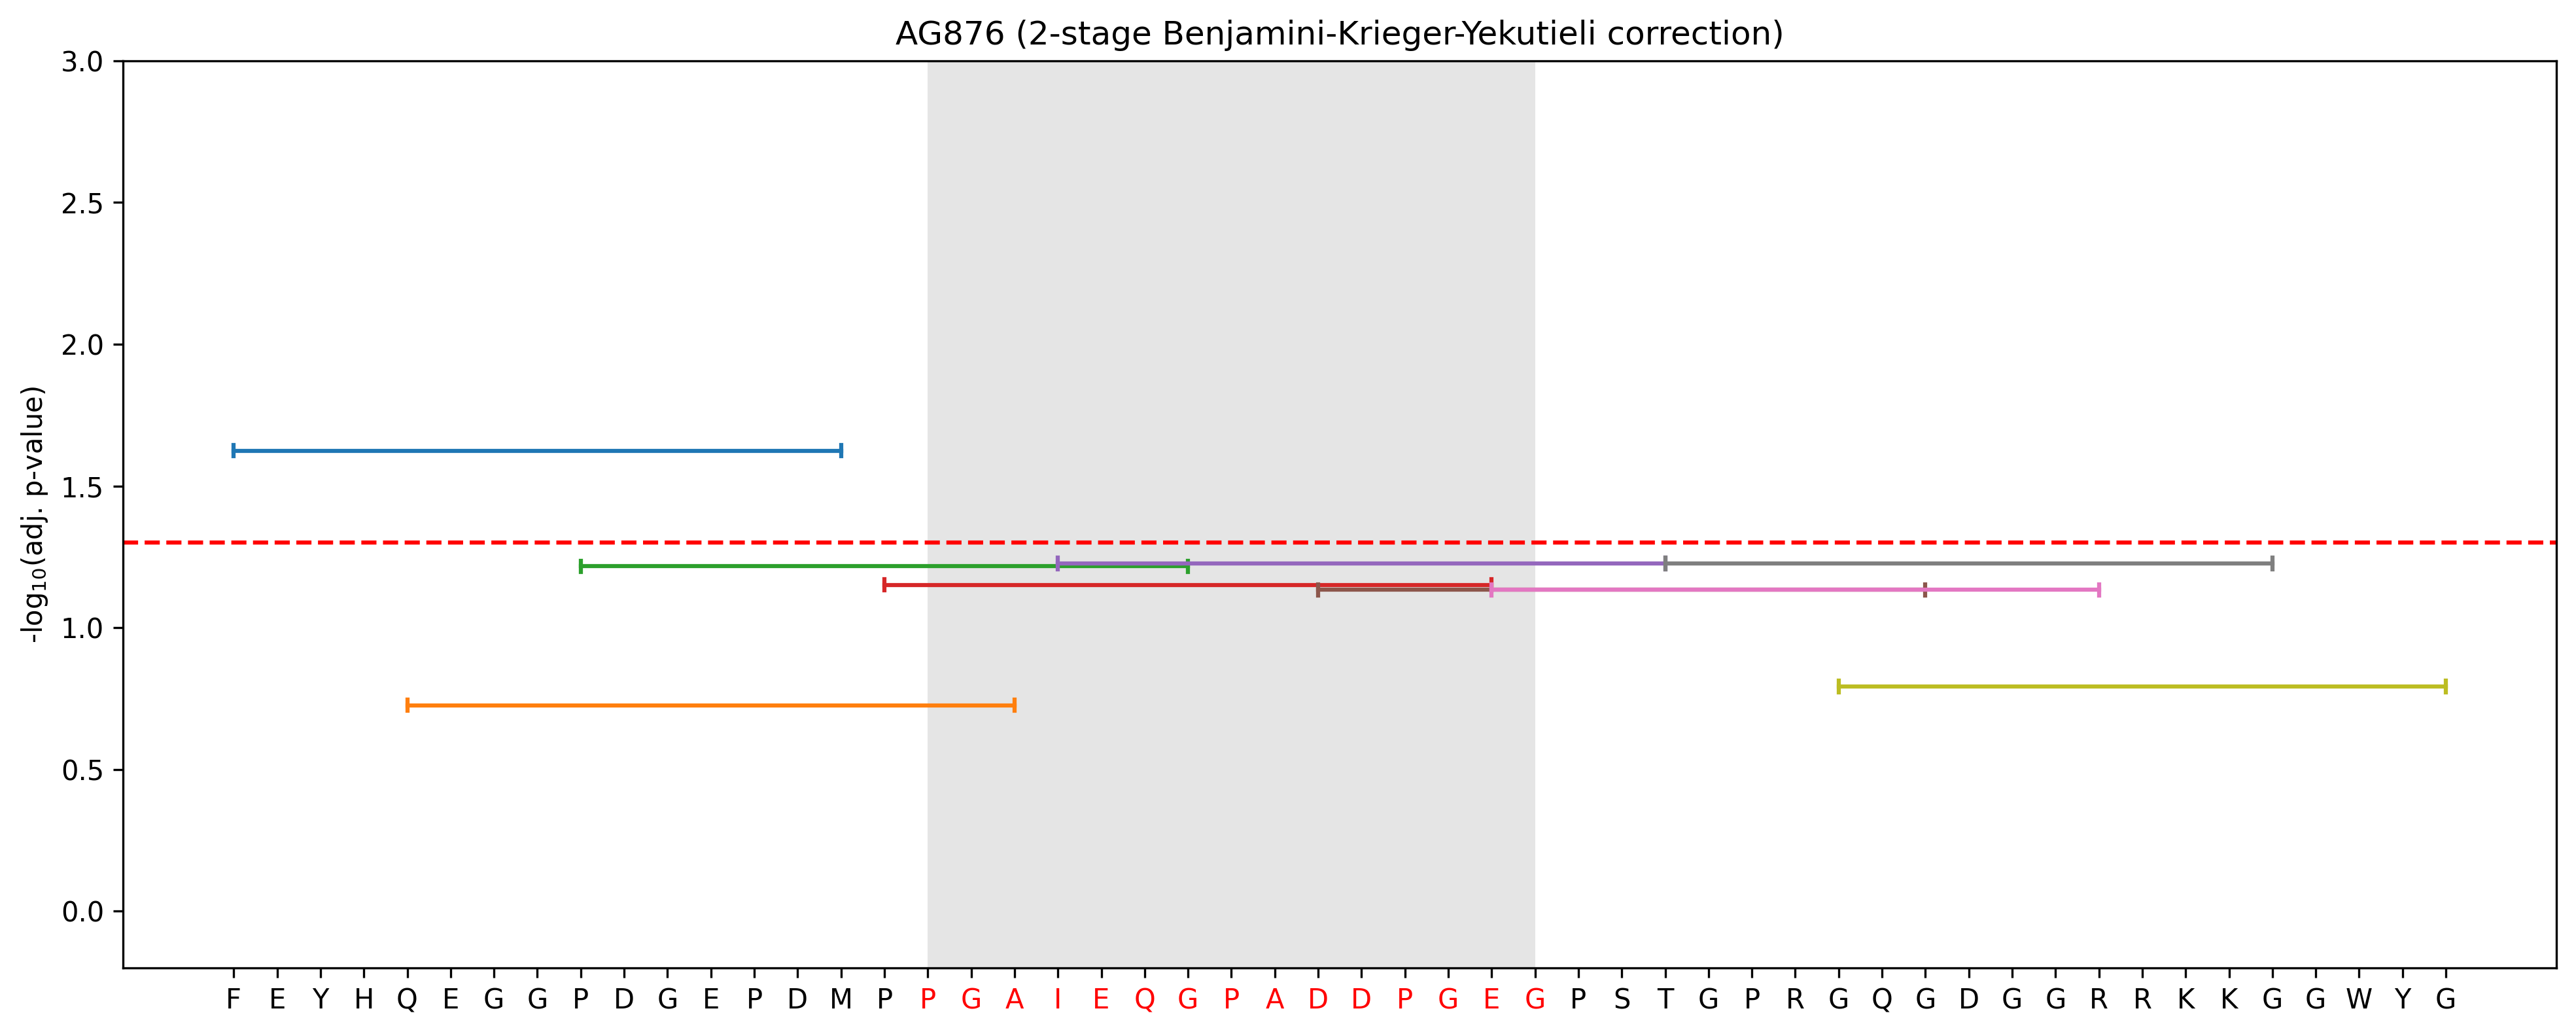

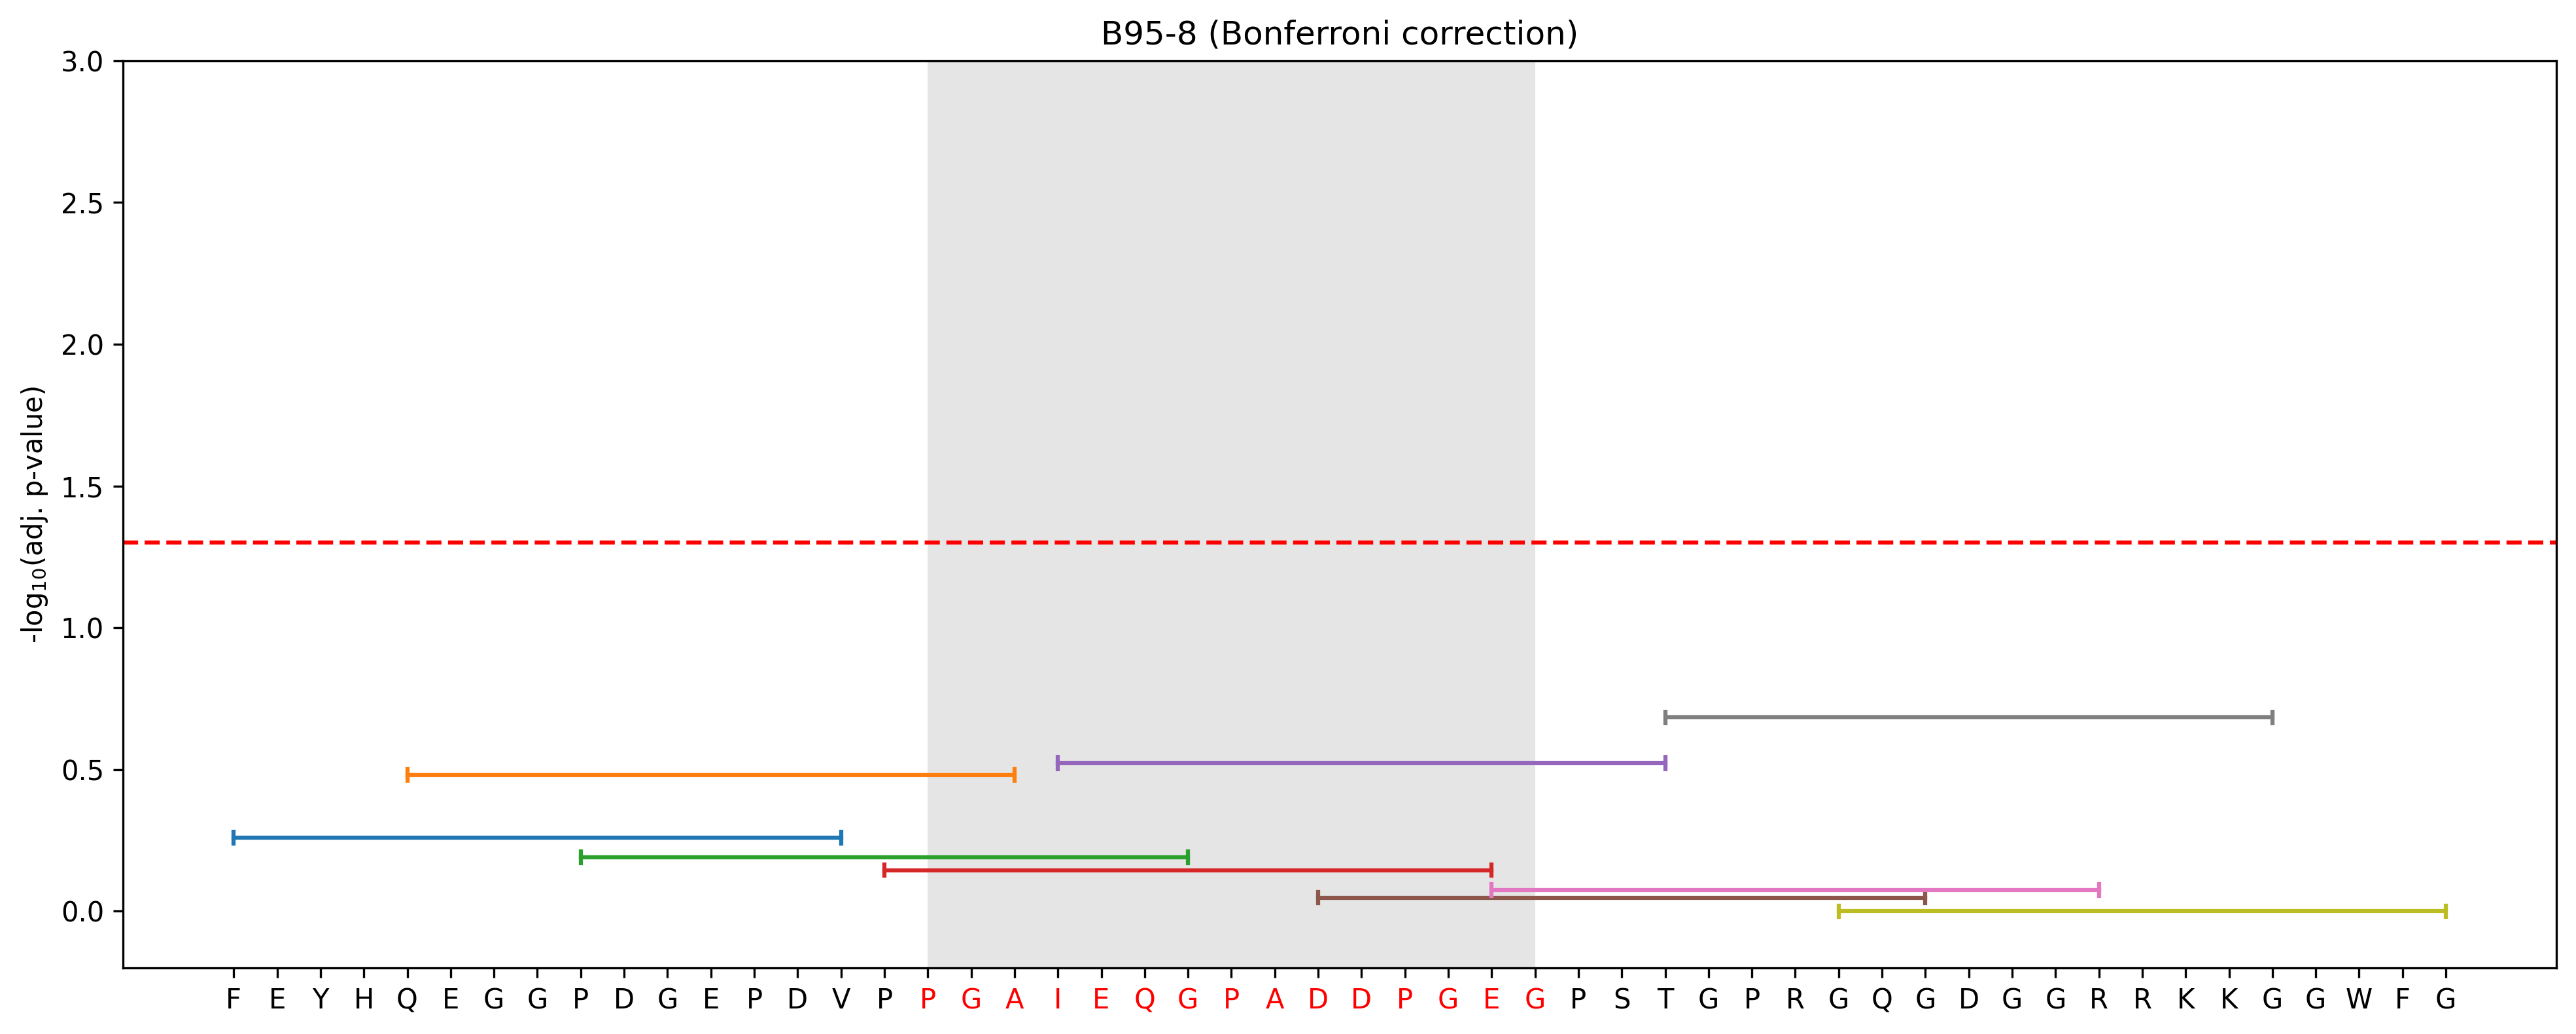

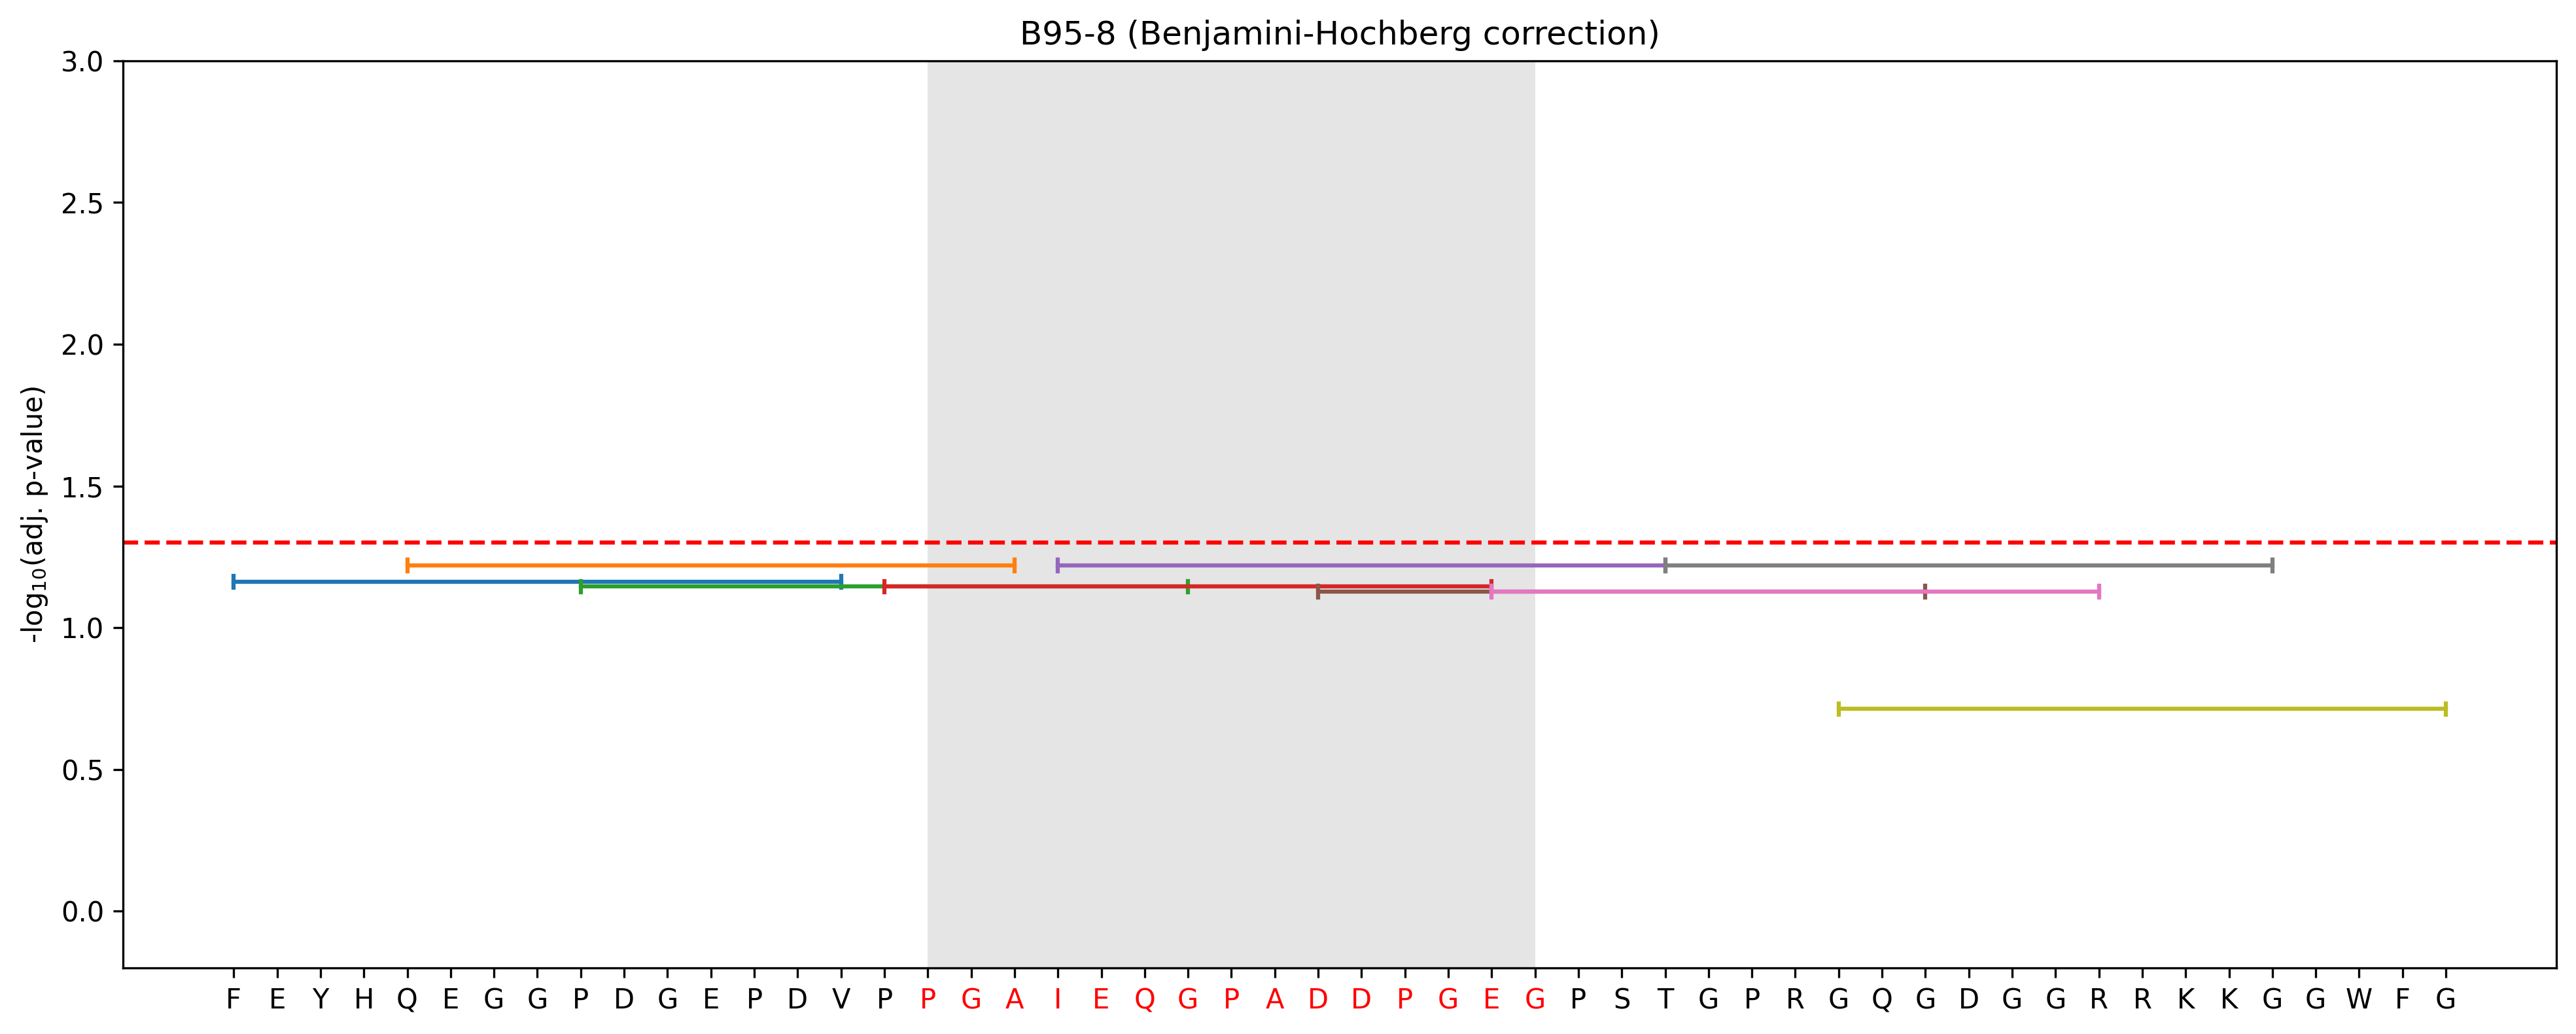

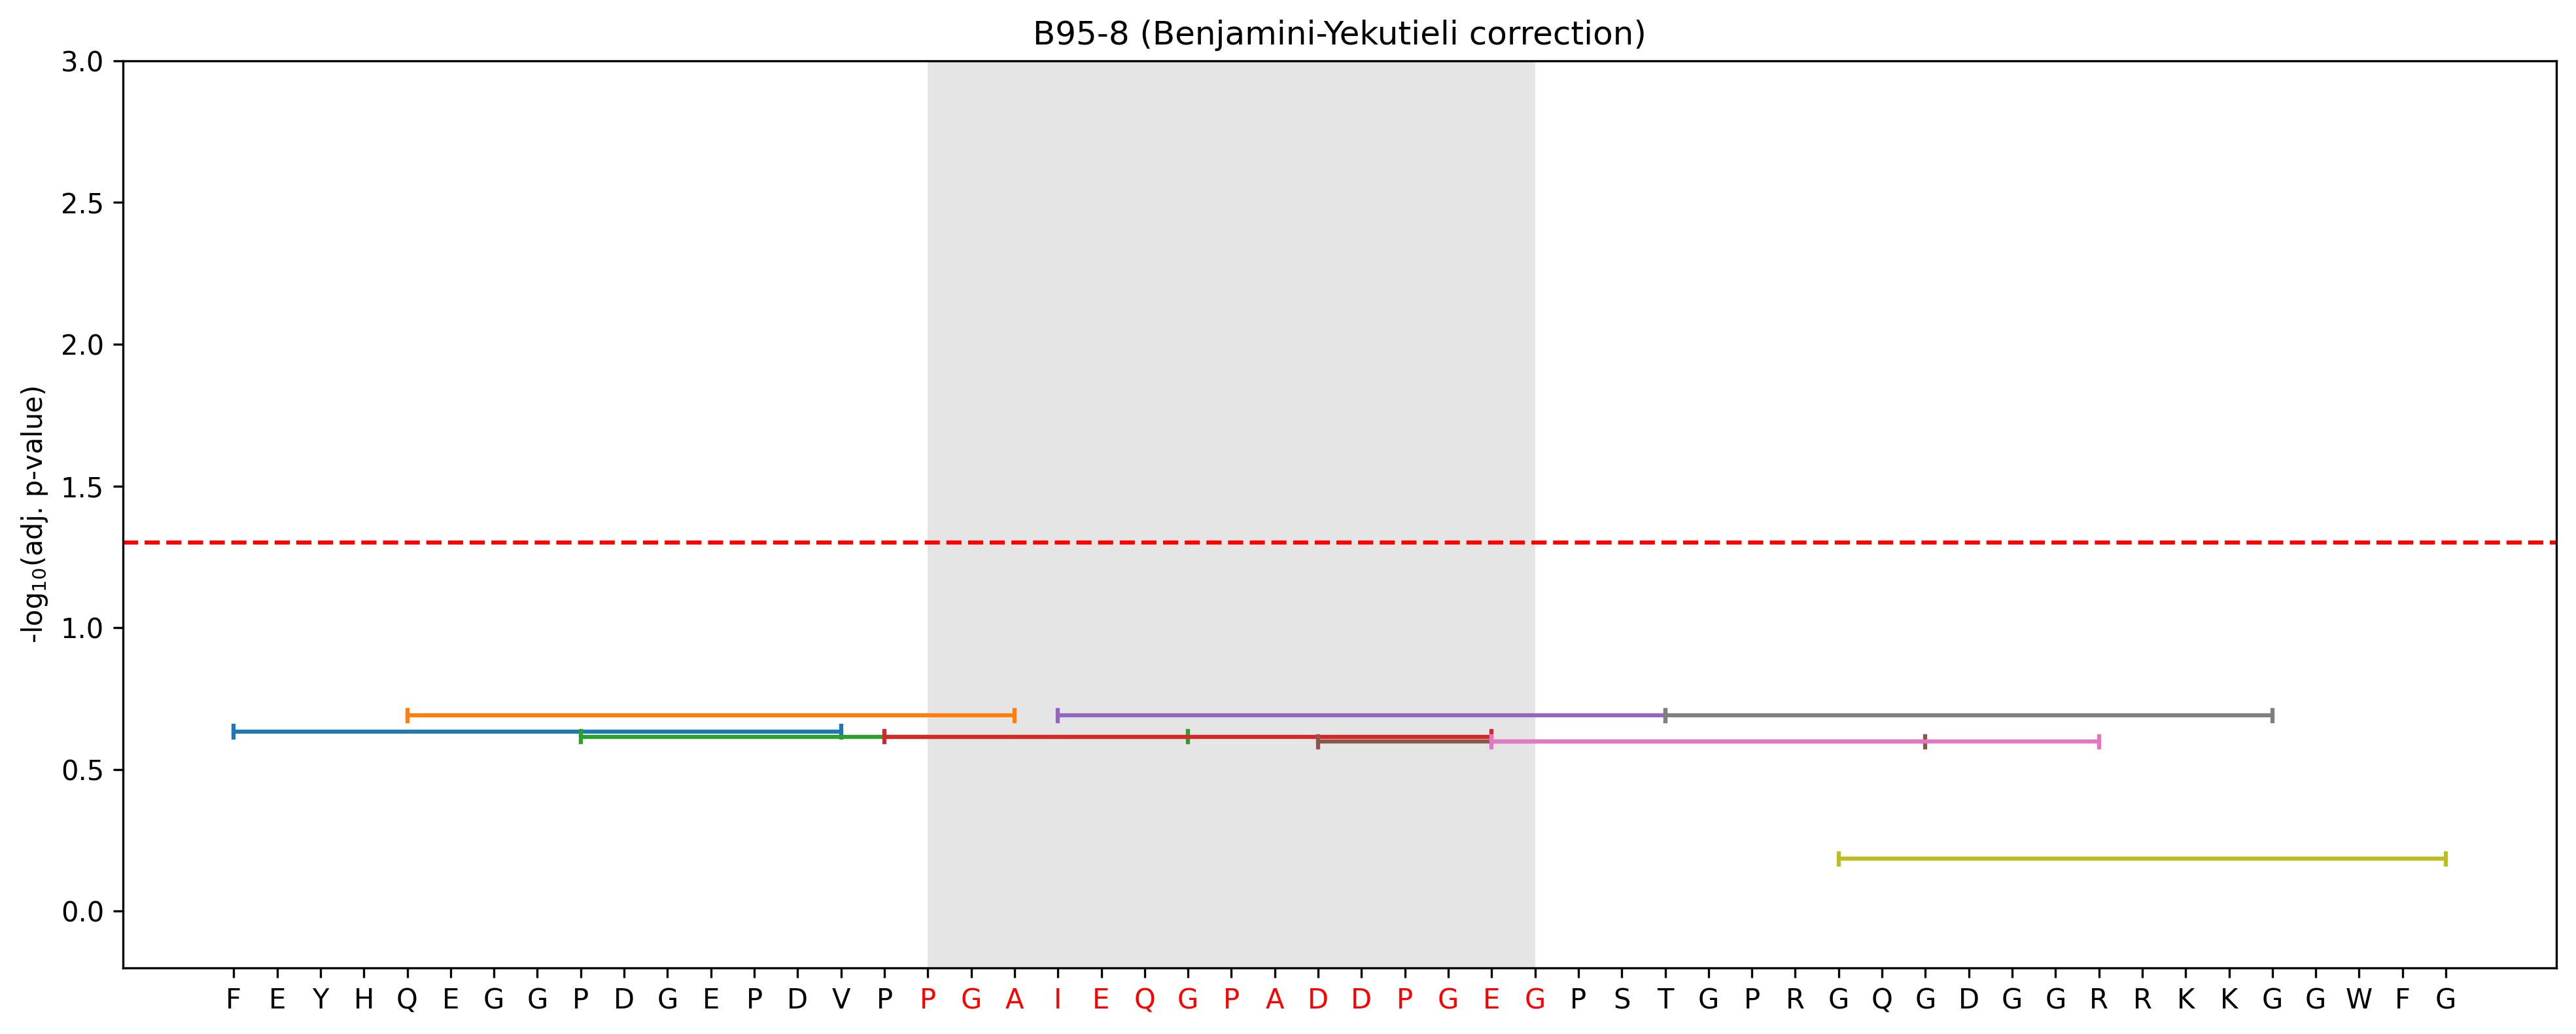

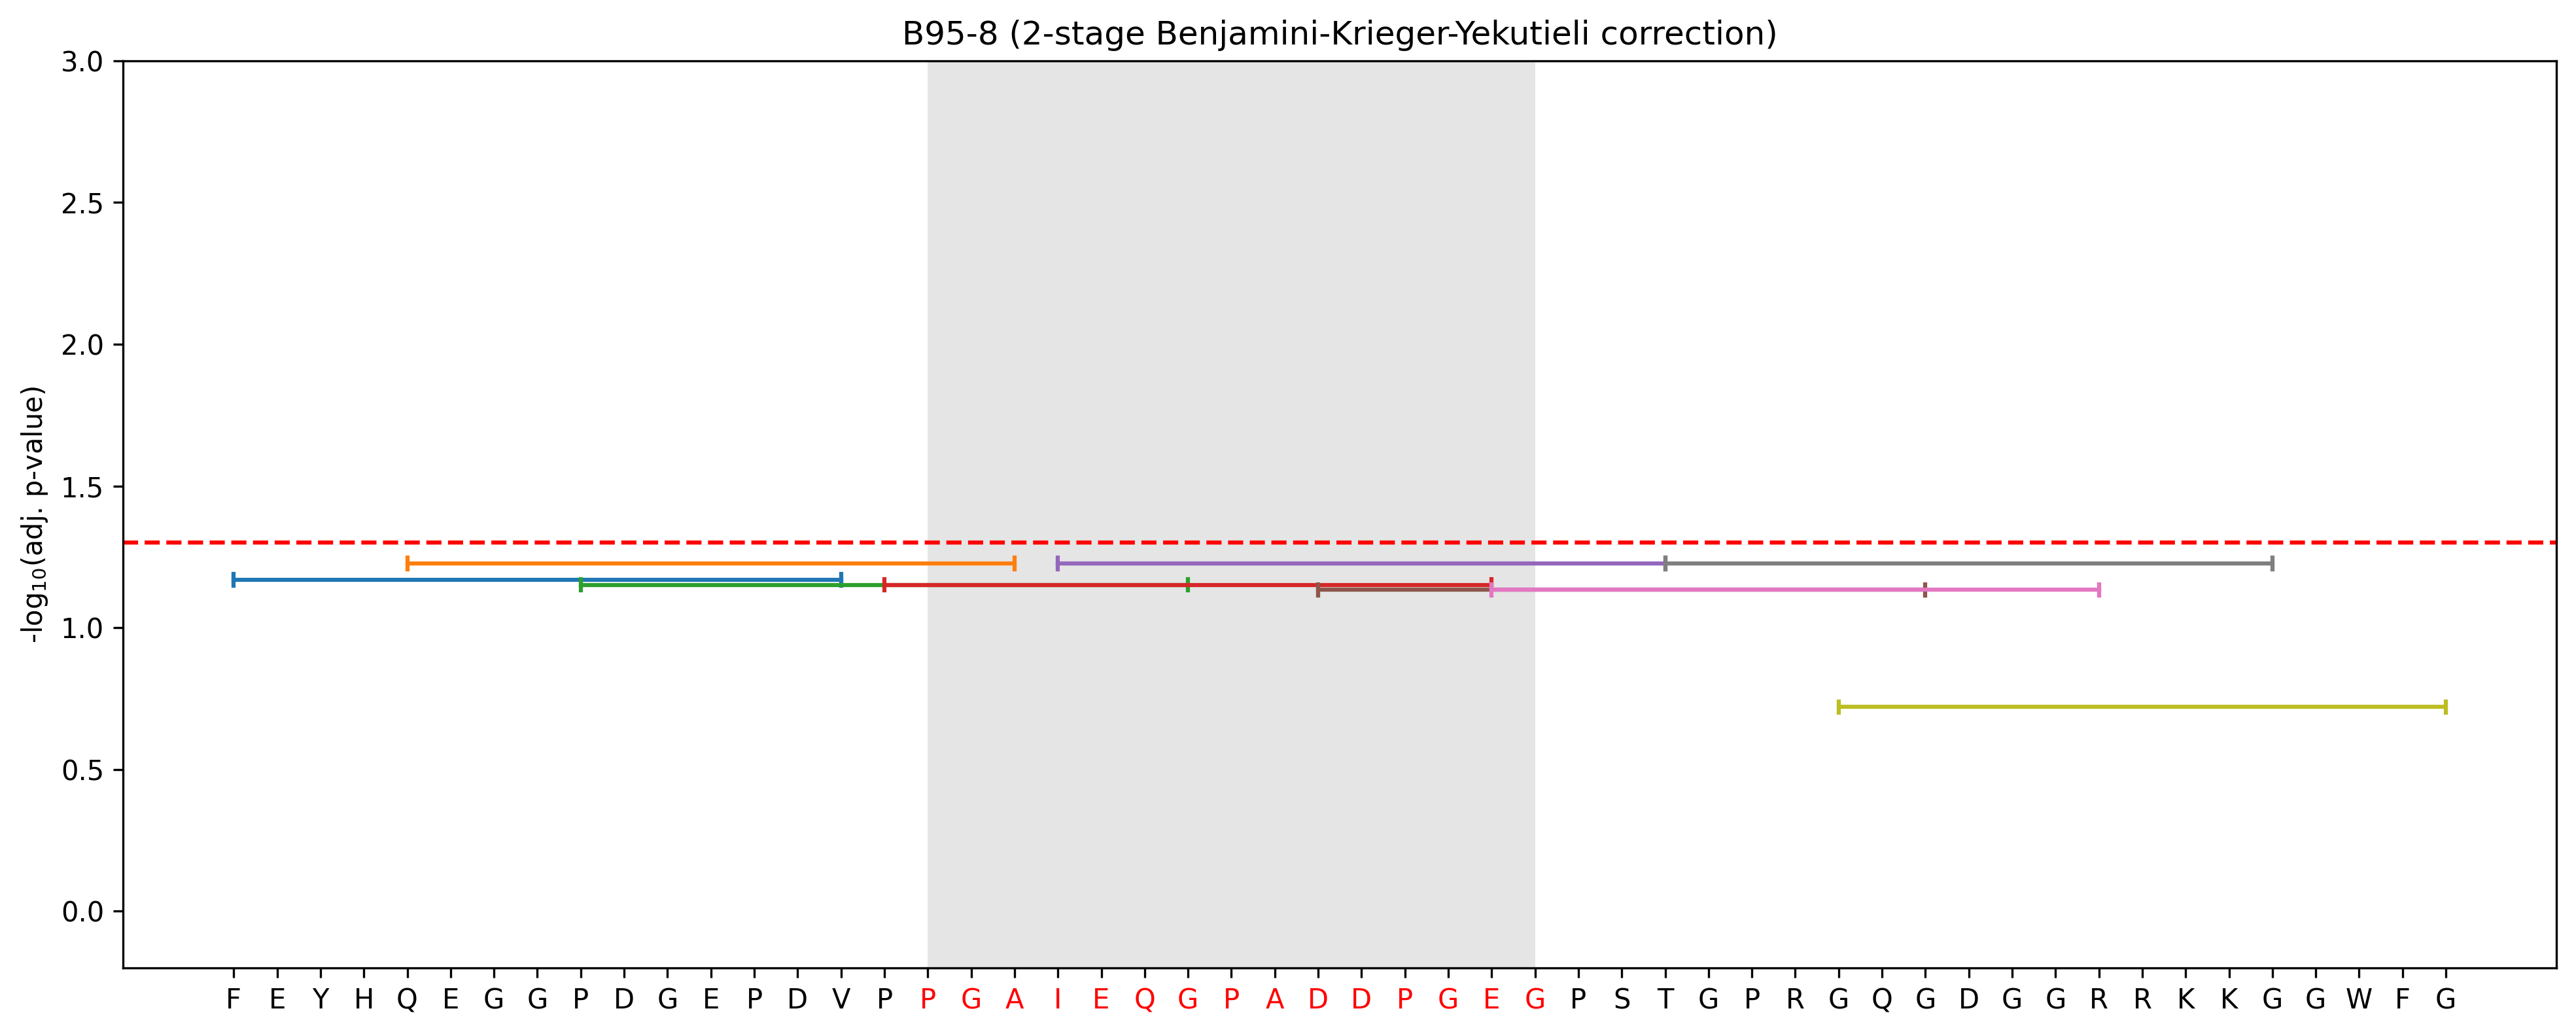

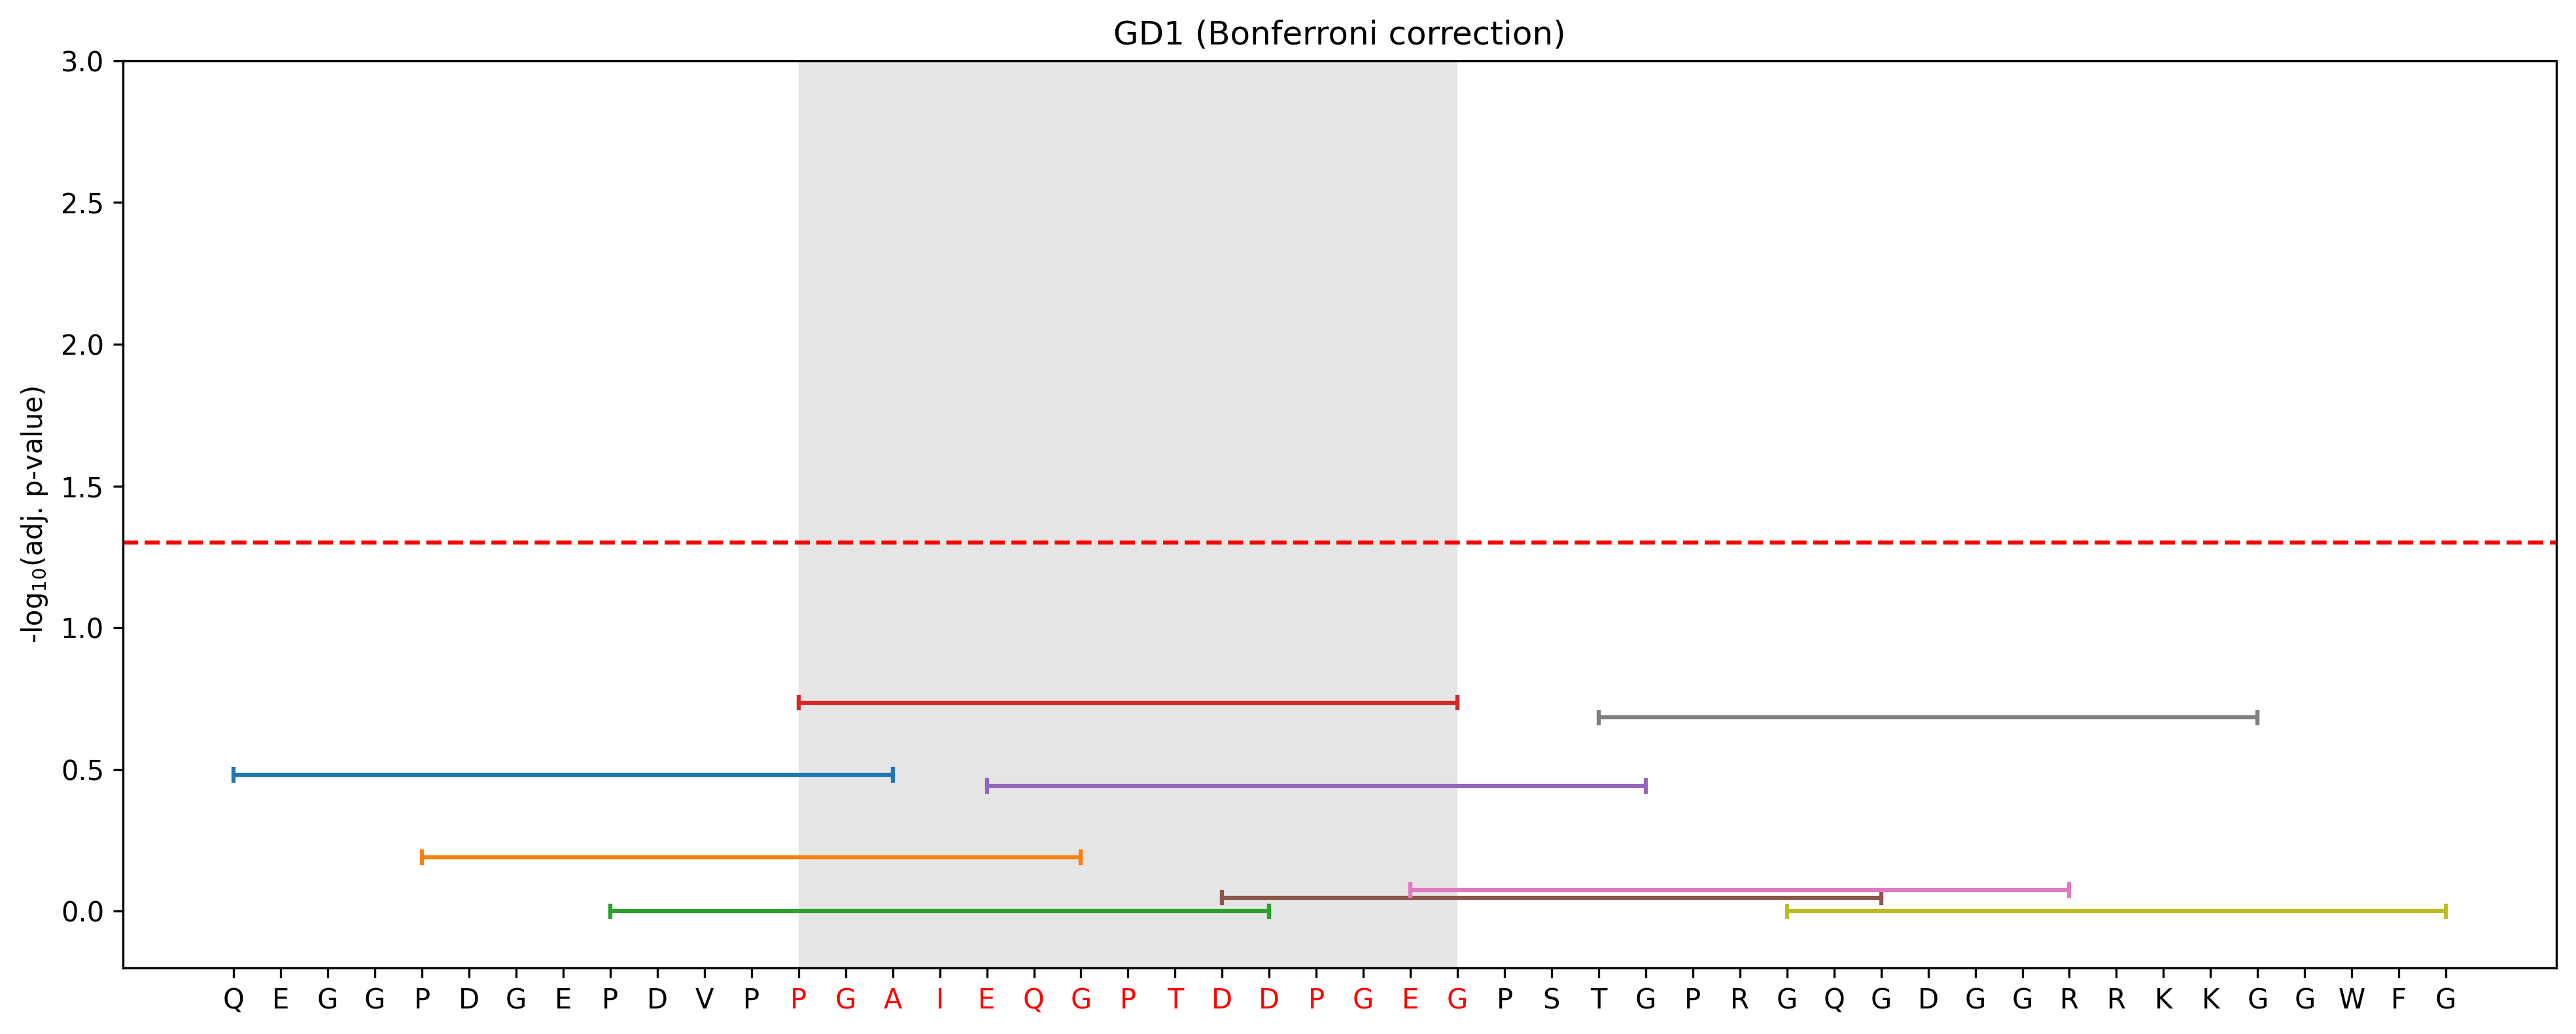

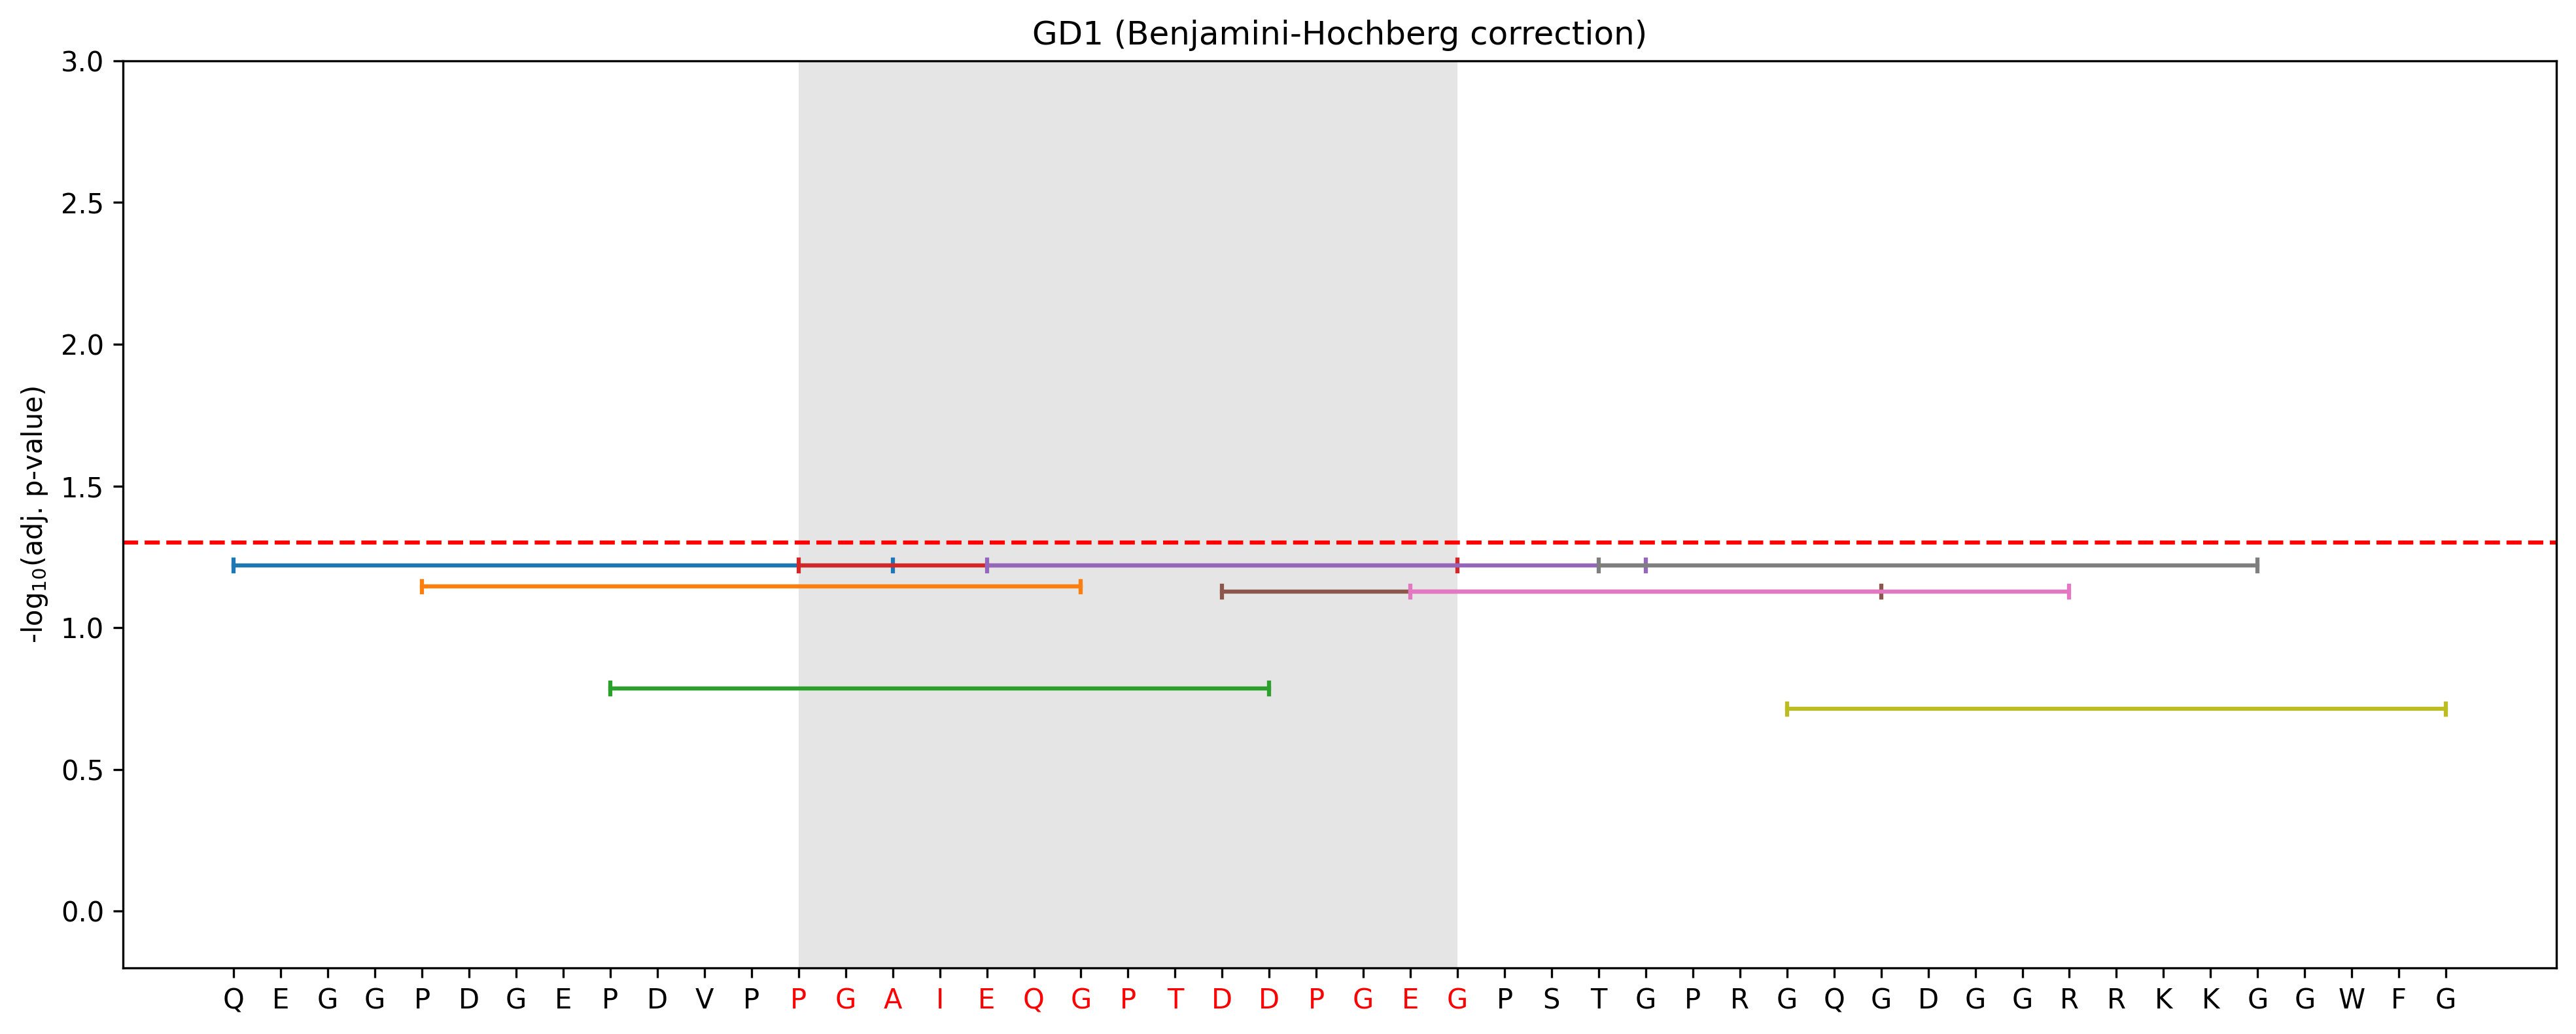

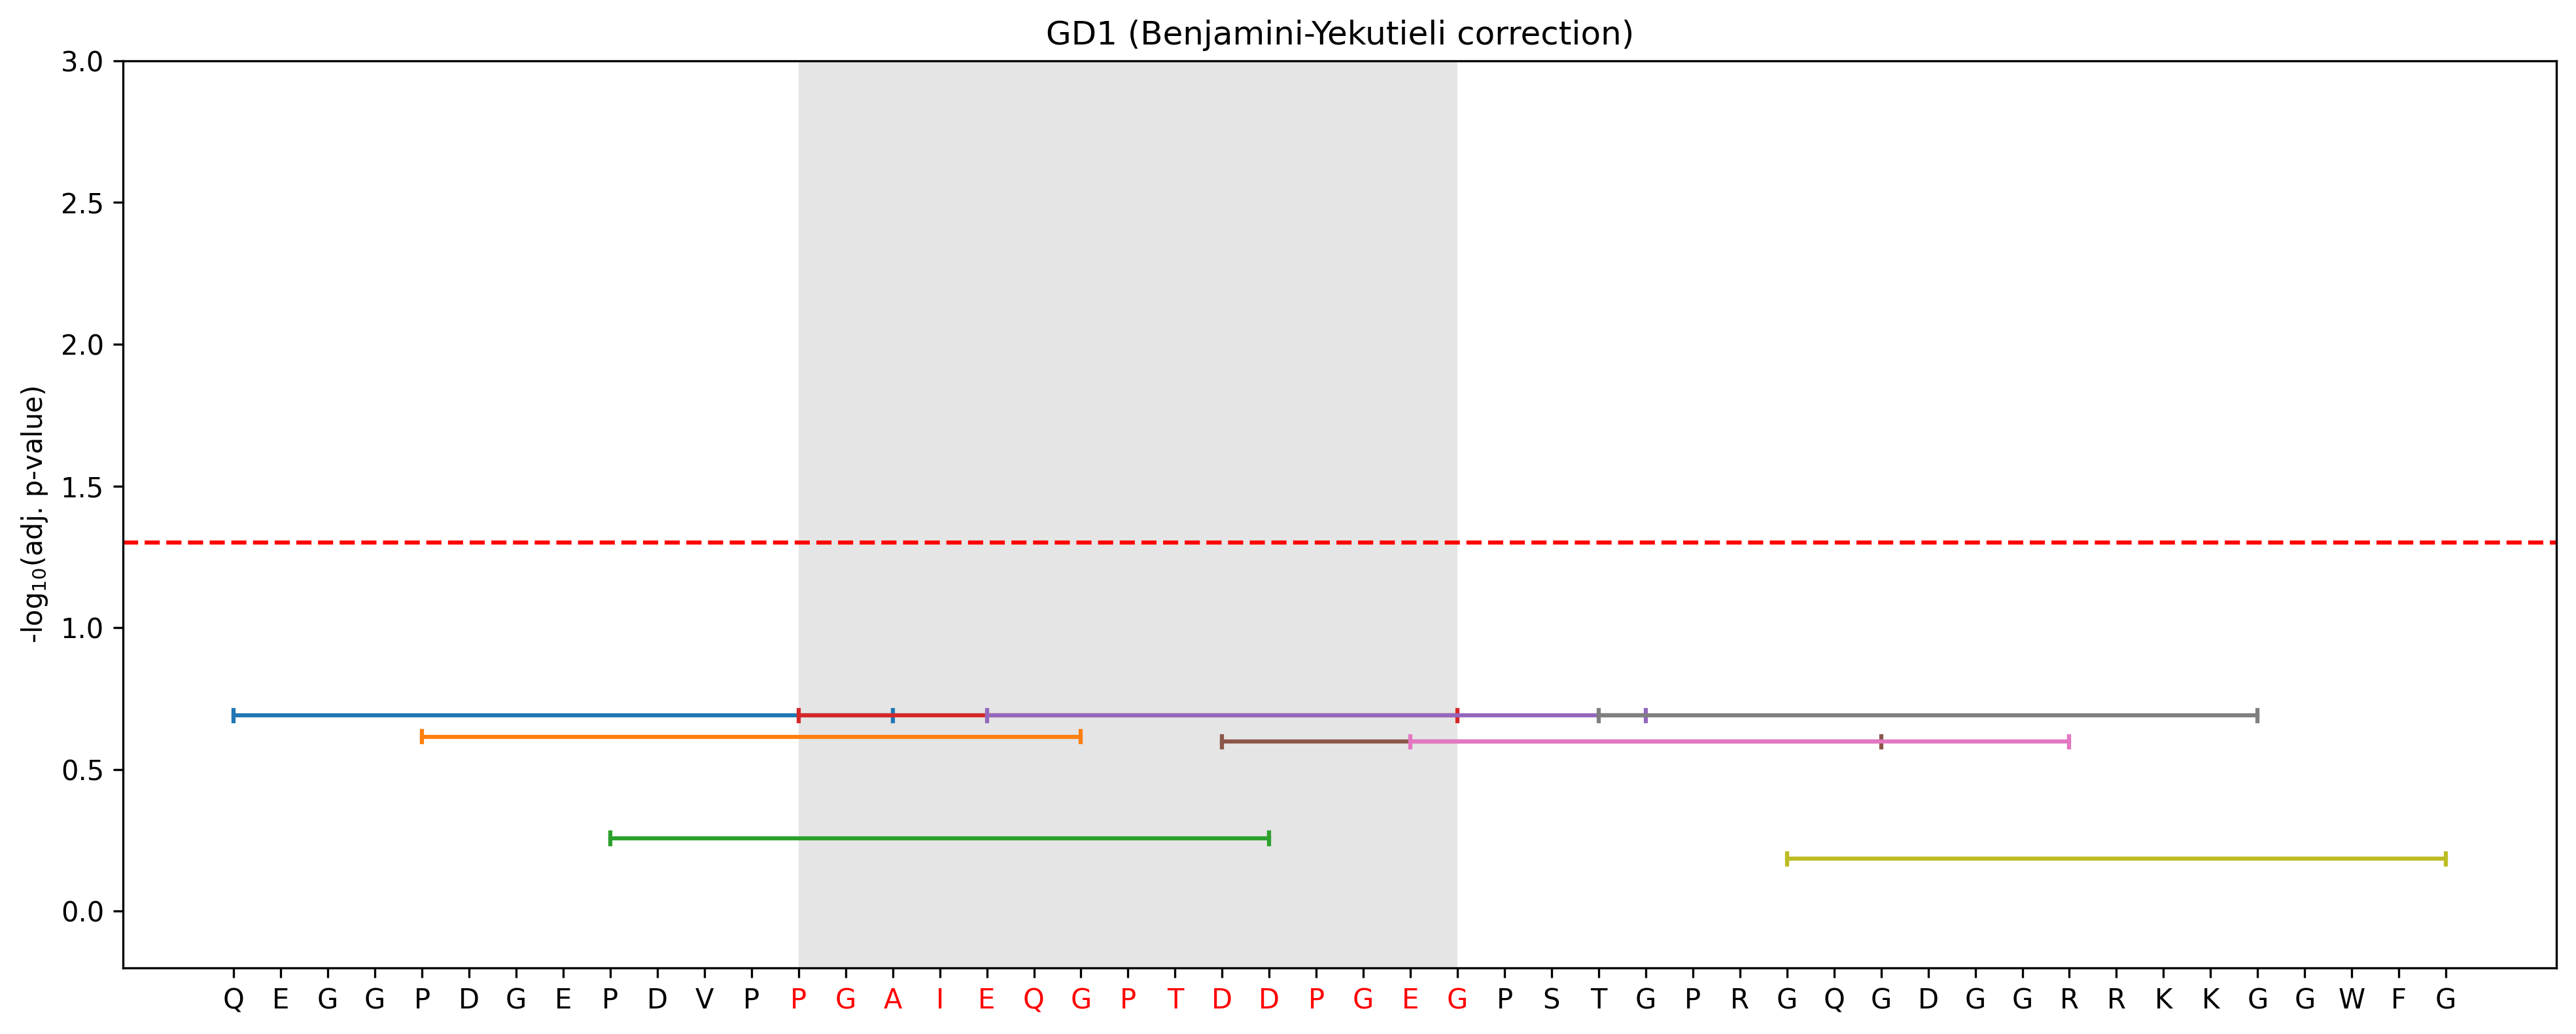

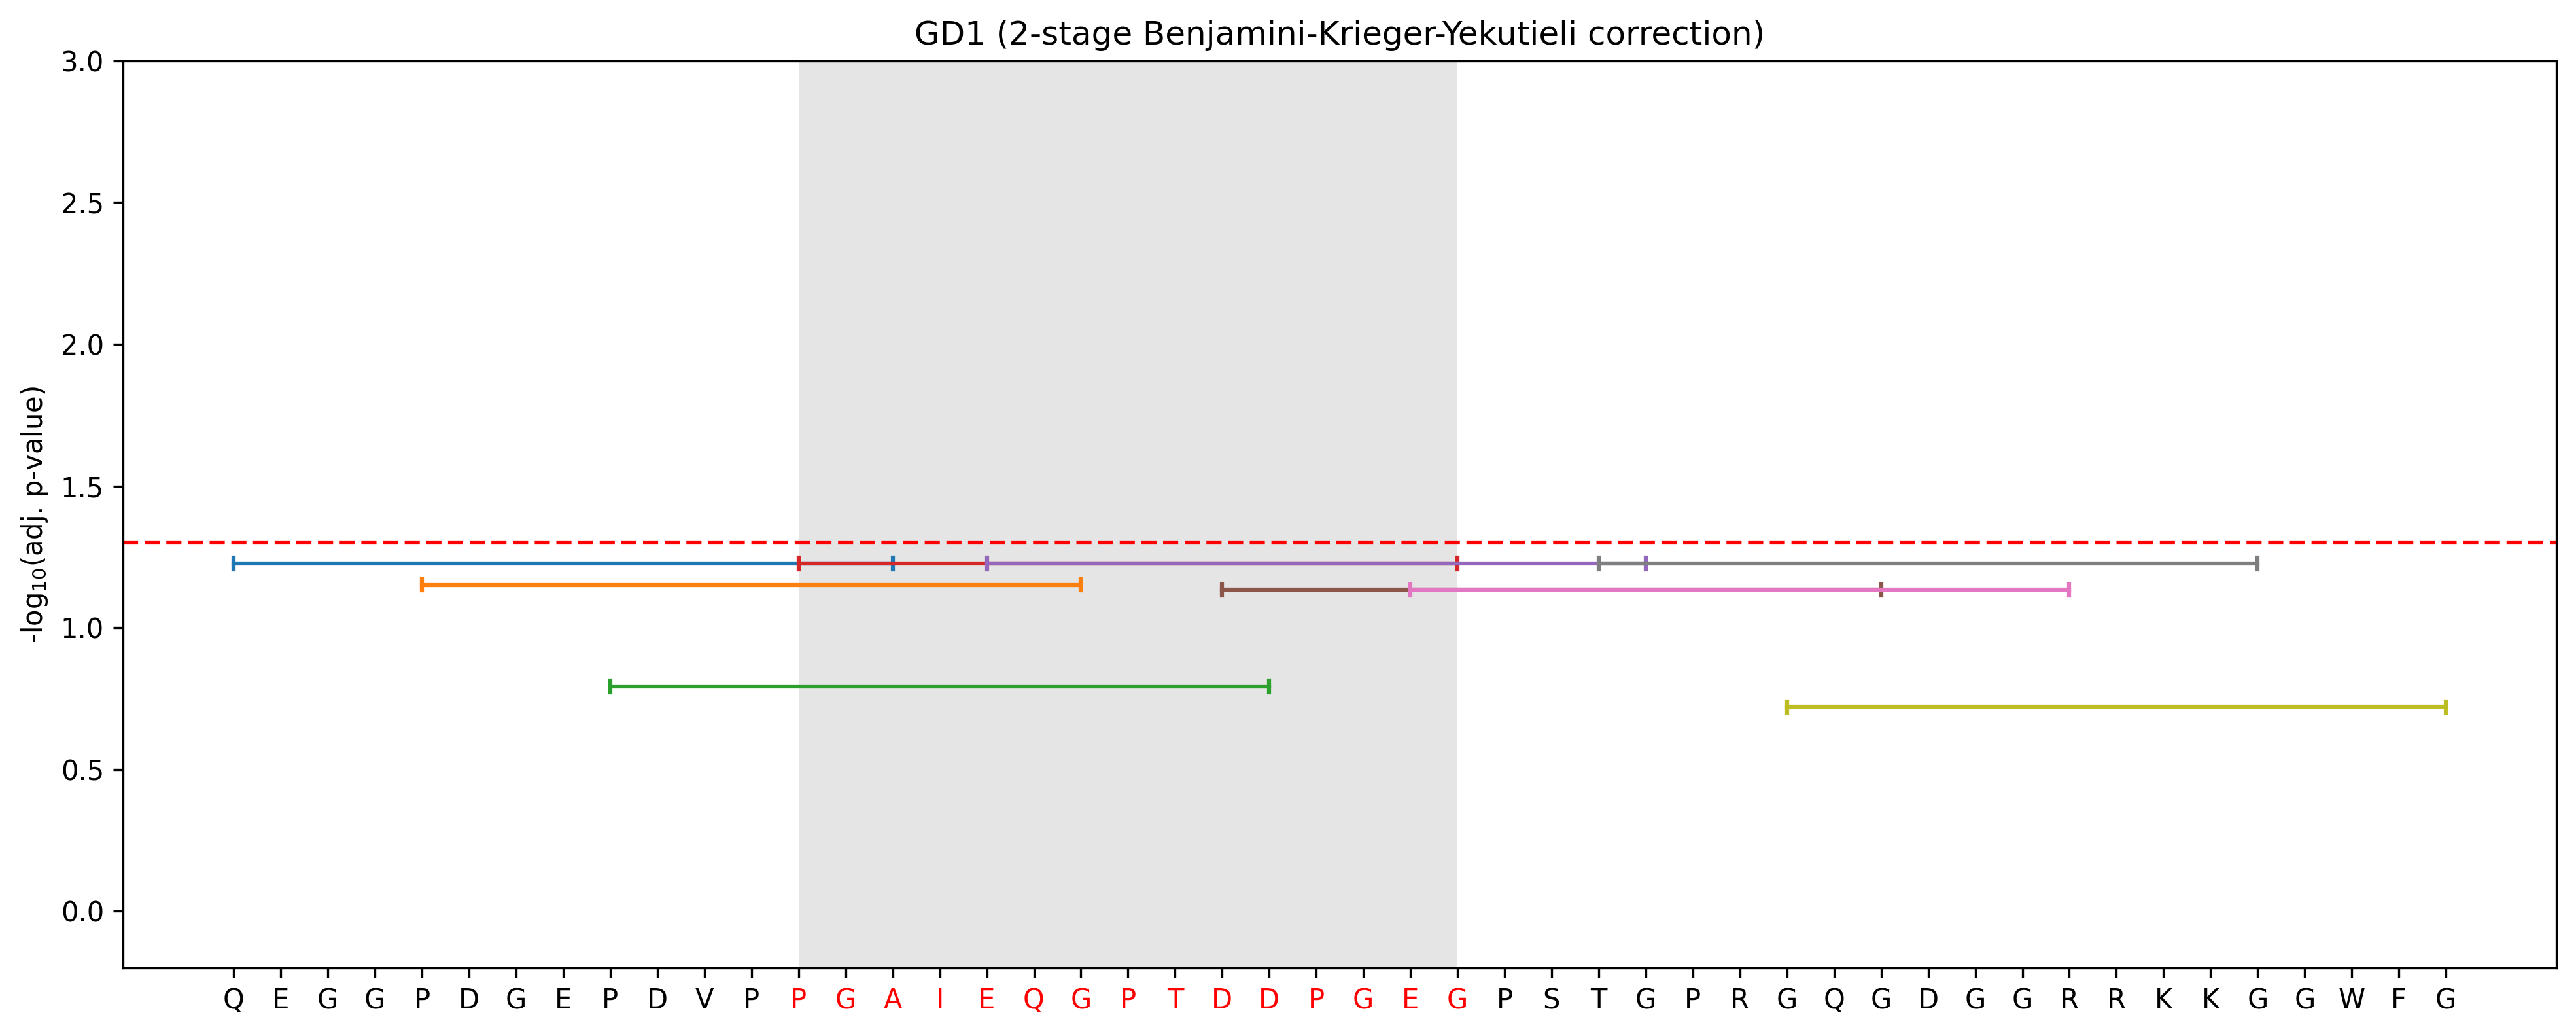

In [25]:
for j in range(len(strains)):
    for i in range(len(correction_types)):
        plot_correction(smr.groups, adj_p_values[i], correction_types[i], strains[j], strain_seqs[j], strain_stops[j], strain_targets[j])